### PROJECT INTRODUCTION

This file presents the PLAN and the EDA part of the Capstone Project of Module 3 at Turing College.

The idea that stands behind this project is to design **RISK EVALUATION** as a service for **RETAIL BANKS**.

Project includes following parts:
-   A. Planning
-   B. Data Analysis
-   C. Building the solution



As a starting point I am going to check datasets from **Home Credit Group**. 

**Home Credit Group** is an international consumer finance provider with operations in eight countries. They focus on responsible lending, primarily to people with little or no credit history.

What they do? 
-   empower people: by delivering a broad range of innovative financial products and services
-   help their customers: by achieving their financial goals / by driving closer relationship between HCG's business partners and their customers
-   financial services:  powered by a dynamic and scalable technology partner.

What they point out is their robust operating model and a **disciplined focus on risk management.**

What the problematic loans are and why dealing with them is necessary?


#### PROBLEMATIC LOANS

**Problem loan**
-   where repayment, as per the terms of the credit agreement, is in doubt
-   a loan, where the ability to recover outstanding principal (in the event of deliquency) is in doubt

As an example, in US, federal regulators use two categories to 'risk grade' problem loans:
-   criticized - exhibit some weakness in safety or soundness (weak DSCR, high leverage, poor liquidity) but loan is still performing - payments are current
-   classified: 1) substandard - either 'unsafe' or 'unsound' meaning inadequate DSCR or collateral coverage or 2) doubtful loans - both 'unsafe' and 'unsound'; loan loss is likely with doubtful credits

Problem Loans present many unique challenges for a financial institution.

My approach to recognize them will be to look at the commercial borrowing relationship holistically to help identify the different ways that a client’s standing might deteriorate. 

My goal is to demonstrate how deteriorating risk on an application can affect a lender’s profitability.

I will try to define how an individual loan officer or credit analyst can differentiate between problem loan symptoms and their underlying causes to help identify early warning signs much more effectively and to get ahead of problem files before they become a serious financial burden for the firm.

A good practice is to incorporate Risk Management Practices that include:
-   strong and consistently-applied credit policies
-   effective risk-rating and loan pricing tools
-   well-diversified base of borrowers: company size/industry/types of loan exposure/risk level

Problem loans generally make up a small proportion of a bank's total credit outstanding, but they take up significant time and resources.

**What is credit risk assessment?**

Credit risk assessment involves estimating the probability of loss resulting from a borrower’s failure to repay a loan or debt. Traditionally, it refers to the risk that the lender may not be able to receive the principal and interest.

Credit risk assessments are carried out on the borrower’s overall ability to repay a loan according to its original terms. To assess credit risk, lenders often look at the 5 Cs: 
-   Credit history, 
-   Capacity to repay, 
-   Capital, 
-   The loan’s conditions and 
-   Associated collateral. 


Credit risk assessments have replaced credit scores as a way of checking a consumer’s trustworthiness, with many financial institutions establishing separate departments for assessing credit risks. They are a key factor for large loans provided by banks, financial institutions, and NBFCs, such as mortgages, credit card bills, etc. 

CRA has a significant impact on interest rates. As the higher the credit risk is perceived, the higher will be the interest rates for the capital. Creditors/banks can also decline loan applications if the risks are too high. In a nutshell, better credit ratings for borrowers attract lower interest rates.

**GOAL: create a custom Credit Scorecard**

*Why*: you can see when a customer or prospect account might pay late when some early signs occure - change credit decision/early reaction and contact with the client

*What is it*: model that quantitatively estimate the probability that customer display a specific behaviour

*How it works*: scorecard ranks clients by riskiness without explicitly identifying their probability of default. It takes into account factors such as payment history, credit card history, behavioral data.

*What are the benefits*: reduced risk of high-risk accounts; increased speed, scale and efficiency.

*What are the limitations*: lack of personalization, limited data, inability to predict new environmental events.

### **INITIAL PROJECT PLAN - CHECKLIST**

1. ASSUMPTIONS:
   
   -   all the stakeholders understand the nature of ML project
   -   all metrics used for model evaluation are understood 
   -   acceptance criteria are well defined
   -   good understanding of the business case
----

2. OVERALL OBJECTIVES AND PROJECT STEPS:
   
   -   PROBLEM DEFINITION - framing the problem, big picture
   -   DATA ANALYSIS - general understanding of the dataset, missing values, outliers and duplicates detection
   -   FEATURE ENGINEERING - removing unnecessary features, creating new features
   -   MODEL BUILDING - testing different ML models, choosing the best performers, hyperparameter tuning
   -   EVALUATION OF MODELS' PERFORMENCE - compering different evaluation metrics
   -   EXPLAINABILITY OF MODELS - checking feature importance
   -   MODEL DEPLOYMENT
   -   BUSINESS CALCULATION: profit/loss
   -   CONCLUSIONS
----

1. OBJECTIVES FOR EACH PART OF THE PLAN:
   
   -   PROBLEM DEFINITION: 
       -   what is the general objective for the projext
       -   how the solution might be used
       -   what is the current solutions?
       -   what tools I am going to use
       -   what is the minimum performance needed to reach the business objective 
   -   DATA ANALYSIS:
       -   get to know the structure (size, type of features) of all the datasets
       -   get to know the basic statistics of features
       -   get to know what each of the feature means and understand if the values provided are accurate
       -   find out what the number of missing value for each column is, build a strategy for filling these missing values
       -   check if duplicates exist and remove them
       -   check if outliers exist and what is the cause of them
       -   data visualisation
       -   compare what is the data distribuiton of the features and how it differs among groups regarding target variable
   -   FEATURE ENGINEERING:
       -   write your own functions to all of the transformations
       -   check what features are highly correlated and removal of redunding features (feature selection)
       -   check what features have zero/quasi-zero variance and remove them
       -   encode categorical variable
       -   missing data inputation
       -   dd promising transformations/create promising new features
   -   MODEL BUILDING:
       -   train/test split
       -   pipeline preparation: preprocessor for numerical and categorical variable, defining common ML models
       -   feature standarization/normalization
       -   cross-validation
       -   hyperparameter tuning
   -   MODELS EVALUATION:
       -   comparing evaluation metrics: precision, recall, f-1 score, ROC-AUC curve, confusion matrices
   -   EXPLAINABILITY OF MODELS
       -   shapley values for best performing models
       -   rebuilding models with 15 most important features and checking model performance
   -   MODEL DEPLOYMENT:
       -    model deployment on Google Cloud Platform, called by HTTPS request
       -    evaluation of traffic with Locust 
   -  BUSINESS CALCULATION:
       -    check what is lender loss when someone does not repay a loan
       -    check what is the profit of well paid loan
       -    check what is the profit/loss trade at different levels of this ratio
   - CONCLUSIONS:
       -    summarization of best performing models, metrics, feature importance
       -    recommendation for lenders

----
----

**IMPORTS.**

In [2]:
# Basic data manipulation and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import float64
from typing import Tuple

# Statistical inference
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
from sklearn.feature_selection import VarianceThreshold

# Functions
from utils import *

import warnings

warnings.simplefilter("ignore")

**LOADING DATA.**

In [3]:
pd.set_option("display.max_colwidth", 0)
sns.set_theme(style="white")

In [4]:
dictionary = pd.read_csv("HomeCredit_columns_description.csv", encoding="latin1")
dictionary.head().style.set_properties(**{"text-align": "left"})

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,nan
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",nan
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,nan
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,nan
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,nan


### **APPLICATION_TRAIN**
-   Main table
-   Static data for all applications. 
-   One row represents one loan in the data sample.

In [5]:
application_train = pd.read_csv("application_train.csv", low_memory=False)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


From 'HomeCredit_columns_description' I can learn that target variable means: 

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 

0 - all other cases

In [7]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Table `application_train` consits of 307511 rows and 122 columns. 16  of them have object type, the rest are numeric.

In [8]:
show_column_description(dictionary, "application_{train|test}")

,Row,Description,Special
0,SK_ID_CURR,ID of loan in our sample,nan
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",nan
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,nan
3,CODE_GENDER,Gender of the client,nan
4,FLAG_OWN_CAR,Flag if the client owns a car,nan
5,FLAG_OWN_REALTY,Flag if client owns a house or flat,nan
6,CNT_CHILDREN,Number of children the client has,nan
7,AMT_INCOME_TOTAL,Income of the client,nan
8,AMT_CREDIT,Credit amount of the loan,nan
9,AMT_ANNUITY,Loan annuity,nan


In [9]:
application_train.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE           0     
NAME_FAMILY_STATUS          0     
NAME_EDUCATION_TYPE         0     
NAME_INCOME_TYPE            0     
SK_ID_CURR                  0     
Length: 122, dtype: int64

In [10]:
sum(application_train.isnull().sum().sort_values(ascending=False) > 0)

67

67 columns have null values.

In [11]:
application_train[application_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


No duplicates.

TARGET distribution.

In [12]:
application_train["TARGET"].value_counts()

0    282686
1    24825 
Name: TARGET, dtype: int64

Less than 10% of loans were rejected.

In [13]:
application_train_objects = application_train.select_dtypes(include="object")
application_train_objects.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [14]:
check_object_values(application_train_objects, 0, 4)

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
Number of unique classes: 2
Number of missing values: 0


CODE_GENDER
['M' 'F' 'XNA']
Number of unique classes: 3
Number of missing values: 0


FLAG_OWN_CAR
['N' 'Y']
Number of unique classes: 2
Number of missing values: 0


FLAG_OWN_REALTY
['Y' 'N']
Number of unique classes: 2
Number of missing values: 0




In [15]:
check_object_values(application_train_objects, 4, 8)

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Number of unique classes: 8
Number of missing values: 1292


NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Number of unique classes: 8
Number of missing values: 0


NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Number of unique classes: 5
Number of missing values: 0


NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Number of unique classes: 6
Number of missing values: 0




In [16]:
check_object_values(application_train_objects, 8, 12)

NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Number of unique classes: 6
Number of missing values: 0


OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Number of unique classes: 19
Number of missing values: 96391


WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Number of unique classes: 7
Number of missing values: 0


ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'

In [17]:
check_object_values(application_train_objects, 12, 16)

FONDKAPREMONT_MODE
['reg oper account' nan 'org spec account' 'reg oper spec account'
 'not specified']
Number of unique classes: 5
Number of missing values: 210295


HOUSETYPE_MODE
['block of flats' nan 'terraced house' 'specific housing']
Number of unique classes: 4
Number of missing values: 154297


WALLSMATERIAL_MODE
['Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Wooden' 'Others' 'Monolithic']
Number of unique classes: 8
Number of missing values: 156341


EMERGENCYSTATE_MODE
['No' nan 'Yes']
Number of unique classes: 3
Number of missing values: 145755




Object-type columns give information about: 
-   what kind of contract a specific application has (cash/revolving)
-   what is the gender of the applicant (M/F/XNA)
-   if the applicant has its own car (Y/N)
-   if the applicant has its own real estate (Y/N)
-   who accompannied applicant in the day of applying for the loan ('Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan 'Other_B' 'Group of people')
-   what is the employment type an applicant has ('Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed' 'Student' 'Businessman' 'Maternity leave')
-   what is the applicant education type ('Secondary / secondary special' 'Higher education' 'Incomplete higher' 'Lower secondary' 'Academic degree')
-   what is the family type of the applicant ('Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' 'Unknown')
-   in what kind of an apartment the applicant live ('House / apartment' 'Rented apartment' 'With parents' 'Municipal apartment' 'Office apartment' 'Co-op apartment')
-   what is the occupation type ('Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers' 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff' 'Security staff' 'High skill tech staff' 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff')
-   at what day of the week the process of application started ('WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY')
-   what is the organization type the applicant work for ('Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA' + 52 other)
-   normalized information about the building the applicants live in ('reg oper account' nan 'org spec account' 'reg oper spec account' 'not specified')
-   normalized information about the type of the building ('block of flats' nan 'terraced house' 'specific housing')
-   normalized information about the material of the building where the applicant lives ('Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Wooden' 'Others' 'Monolithic')
-   normalized information if the building where tha applicant lives is in emergency state ('No' nan 'Yes')

These features give us a general idea what is the profile of applicants.

I would like to take a general look how those information correspond with the fact if someone had payment difficulties or not.

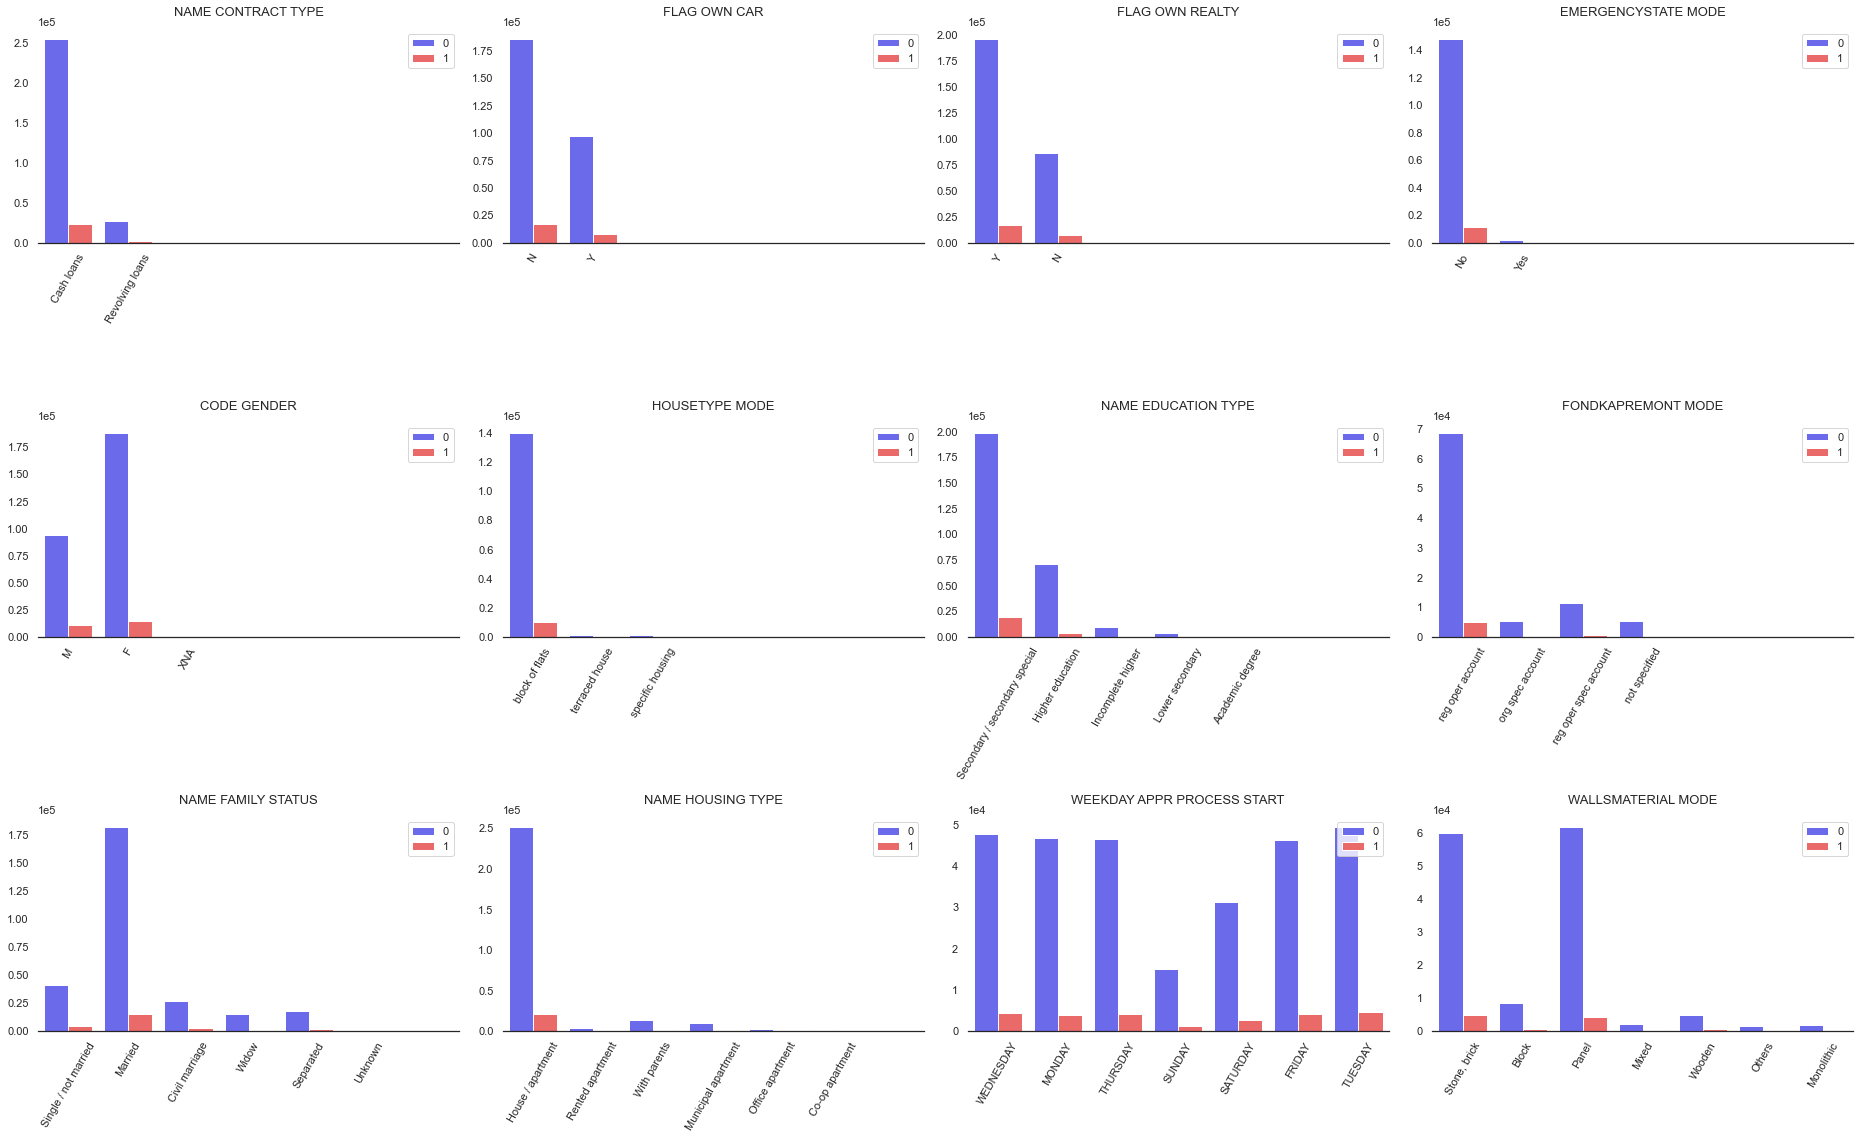

In [18]:
list_of_columns = [
    "NAME_CONTRACT_TYPE",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "EMERGENCYSTATE_MODE",
    "CODE_GENDER",
    "HOUSETYPE_MODE",
    "NAME_EDUCATION_TYPE",
    "FONDKAPREMONT_MODE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "WEEKDAY_APPR_PROCESS_START",
    "WALLSMATERIAL_MODE",
]

diff_in_distr(application_train, list_of_columns, "TARGET")


In [19]:
application_train_numeric = application_train.select_dtypes(exclude="object")
application_train_numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
len(
    application_train_numeric.isnull()
    .sum()[application_train_numeric.isnull().sum() > 0]
    .sort_values(ascending=False)
)


61

In [21]:
len(
    application_train_numeric.isnull()
    .sum()[
        application_train_numeric.isnull().sum()
        >= 0.5 * (len(application_train_numeric))
    ]
    .sort_values(ascending=False)
)

38

61 out of 106 columns have some missing values, 38 of them have equal or more than 50% of missing values.

I am going to take a look how the distribution of the data looks like.

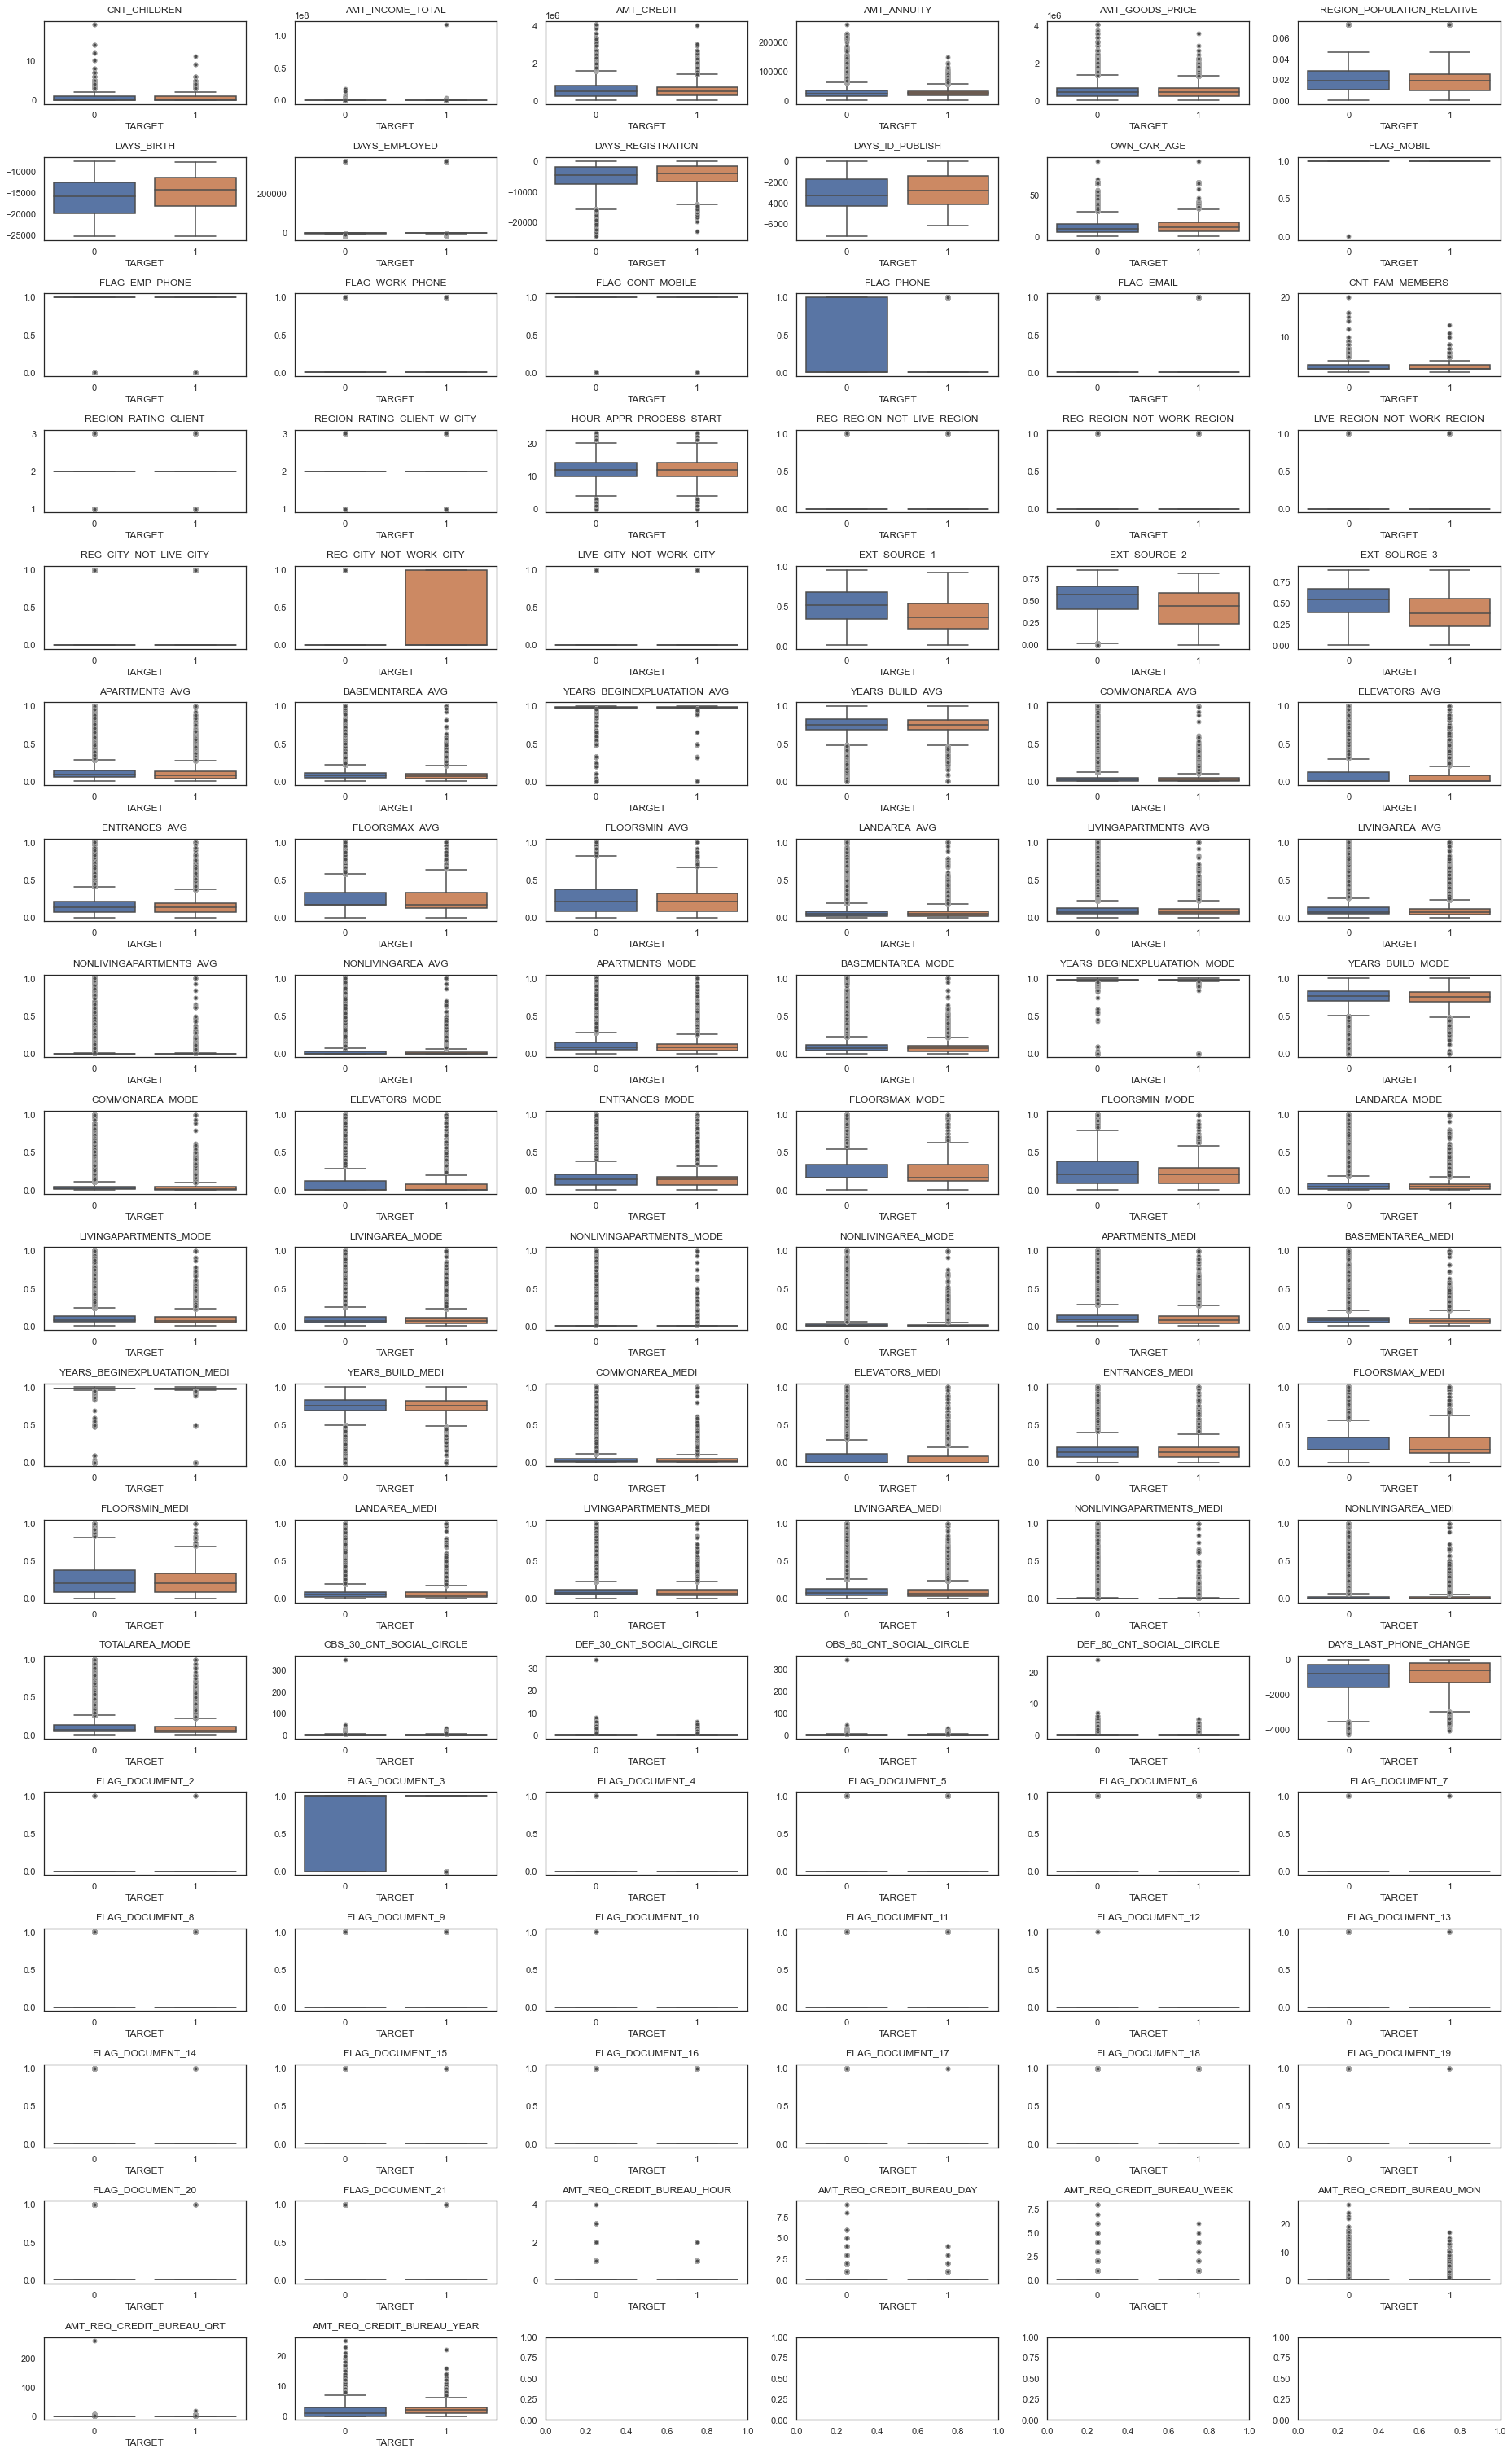

In [22]:
boxplots_with_target(application_train_numeric, 18, 6, "TARGET", (26, 42))

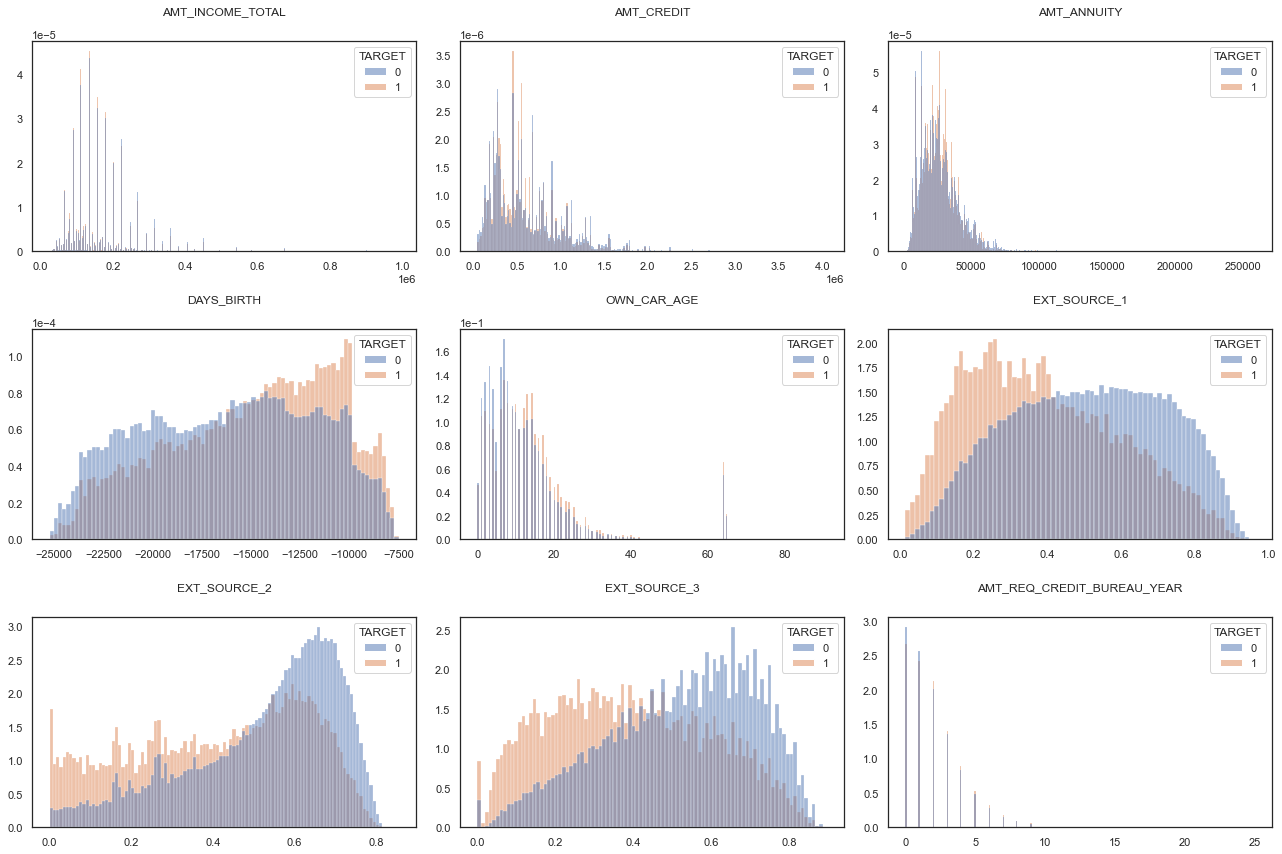

In [26]:
plot_histograms(
    application_train_numeric[application_train["AMT_INCOME_TOTAL"] < 1000000][
        [
            "SK_ID_CURR",
            "TARGET",
            "AMT_INCOME_TOTAL",
            "AMT_CREDIT",
            "AMT_ANNUITY",
            "DAYS_BIRTH",
            "OWN_CAR_AGE",
            "EXT_SOURCE_1",
            "EXT_SOURCE_2",
            "EXT_SOURCE_3",
            "AMT_REQ_CREDIT_BUREAU_YEAR",
        ]
    ],
    3,
    3,
    (18, 12),
    application_train_numeric["TARGET"],
)

**HYPOTHESIS TESTING**

In [27]:
difficulties = application_train[application_train["TARGET"] == 1][
    [
        "NAME_CONTRACT_TYPE",
        "HOUSETYPE_MODE",
        "DAYS_BIRTH",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
]
no_difficulties = application_train[application_train["TARGET"] == 0][
    [
        "NAME_CONTRACT_TYPE",
        "HOUSETYPE_MODE",
        "DAYS_BIRTH",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
]

In [28]:
difficulties.describe()


,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,24825.000000,10054.000000,24773.000000,19148.000000
mean,-14884.828077,0.386968,0.410935,0.390717
std,4192.844583,0.204729,0.213107,0.205810
min,-25168.000000,0.014691,0.000005,0.000527
25%,-18037.000000,0.221847,0.238568,0.223831
50%,-14282.000000,0.361675,0.440381,0.379100
75%,-11396.000000,0.537508,0.594190,0.553165
max,-7678.000000,0.929394,0.811870,0.896010


In [29]:
no_difficulties.describe()


,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,282686.000000,124079.000000,2.820780e+05,227398.000000
mean,-16138.176397,0.511461,5.234787e-01,0.520969
std,4364.200856,0.208804,1.862767e-01,0.190465
min,-25229.000000,0.014568,8.173617e-08,0.000527
25%,-19793.750000,0.345430,4.097866e-01,0.385915
50%,-15877.000000,0.517452,5.739047e-01,0.546023
75%,-12536.000000,0.682839,6.677051e-01,0.673830
max,-7489.000000,0.962693,8.549997e-01,0.893976


**Test n.1.**

What is the difference in proportions of people who had/didn't have payments problem in terms of chosen contract type and type of a house

**Population:** people with payment difficulties (p1) and people without payment difficulties (p2)

**Parameter of interest:** difference in population proportions (p1-p2)

I take 95% confidence interval, 5% significance.

In [30]:
lower, upper = smprop.confint_proportions_2indep(
    difficulties["NAME_CONTRACT_TYPE"]
    .where(difficulties["NAME_CONTRACT_TYPE"] == "Revolving loans")
    .count(),
    len(difficulties),
    no_difficulties["NAME_CONTRACT_TYPE"]
    .where(no_difficulties["NAME_CONTRACT_TYPE"] == "Revolving loans")
    .count(),
    len(no_difficulties),
)

f"Confidence interval: {round(lower*100, 2)} - {round(upper*100, 2)}"

'Confidence interval: -3.65 - -3.0'

In [31]:
lower, upper = smprop.confint_proportions_2indep(
    difficulties["HOUSETYPE_MODE"]
    .where(difficulties["HOUSETYPE_MODE"] == "block of flats")
    .count(),
    len(difficulties),
    no_difficulties["HOUSETYPE_MODE"]
    .where(no_difficulties["HOUSETYPE_MODE"] == "block of flats")
    .count(),
    len(no_difficulties),
)

f"Confidence interval: {round(lower*100, 2)} - {round(upper*100, 2)}"

'Confidence interval: -8.09 - -6.81'

With 95% confidence interval, the proportion of people who had payments' difficulties and took revolving loans is estimated to be between 3.65-3.0 smaller than proportion of people who did not have payments difficulties. In terms of houstype_mode this difference is more visible and is between 8.09-6.81 smaller (in terms of living in block of flats).

**Test nr.2-5.**

Definition of null and alternative hypothesis:

**Null:** There is no difference between the mean age/ext_source 1:3 of people who had/did not have payments difficulties.

**Alternative:** There is significant difference in mean age/ext_source 1:3.

Significance level - 5%

In [32]:
t_test, p_value, df = sm.stats.ttest_ind(
    difficulties["DAYS_BIRTH"], no_difficulties["DAYS_BIRTH"], usevar="unequal"
)

f"t_test: {round(t_test,2)}, p_value: {p_value}, df: {round(df,2)}"

't_test: 45.01, p_value: 0.0, df: 29748.72'

In [33]:
difficulties = difficulties.dropna()
no_difficulties = no_difficulties.dropna()

In [34]:
t_test, p_value, df = sm.stats.ttest_ind(
    no_difficulties["EXT_SOURCE_1"], difficulties["EXT_SOURCE_1"], usevar="pooled"
)

f"t_test: {round(t_test,2)}, p_value: {p_value}, df: {round(df,2)}"

't_test: 36.26, p_value: 1.1467210321443251e-284, df: 57480.0'

In [35]:
t_test, p_value, df = sm.stats.ttest_ind(
    no_difficulties["EXT_SOURCE_2"], difficulties["EXT_SOURCE_2"], usevar="pooled"
)

f"t_test: {round(t_test,2)}, p_value: {p_value}, df: {round(df,2)}"

't_test: 31.99, p_value: 1.4555025760671075e-222, df: 57480.0'

In [36]:
t_test, p_value, df = sm.stats.ttest_ind(
    no_difficulties["EXT_SOURCE_3"], difficulties["EXT_SOURCE_3"], usevar="pooled"
)

f"t_test: {round(t_test,2)}, p_value: {p_value}, df: {round(df,2)}"

't_test: 39.47, p_value: 0.0, df: 57480.0'

In all of the chosen features difference p_value is equal to 0 , so the difference in population proportion among people who ad or did not have payment difficulties differs significantly.

I expect that those features might have significant impact on models prediction.

CHECKING IF THERE ARE CONSTANT/QUASI-CONSTANT FEATURES IN APPLICATION TRAIN DATASET.

In [37]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(application_train_numeric)

concol = [
    column
    for column in application_train_numeric.columns
    if column not in application_train_numeric.columns[selector.get_support()]
]

for features in concol:
    print(features)


REGION_POPULATION_RELATIVE
FLAG_MOBIL
FLAG_CONT_MOBILE
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
COMMONAREA_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
COMMONAREA_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
COMMONAREA_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR


In [38]:
len(concol)

41

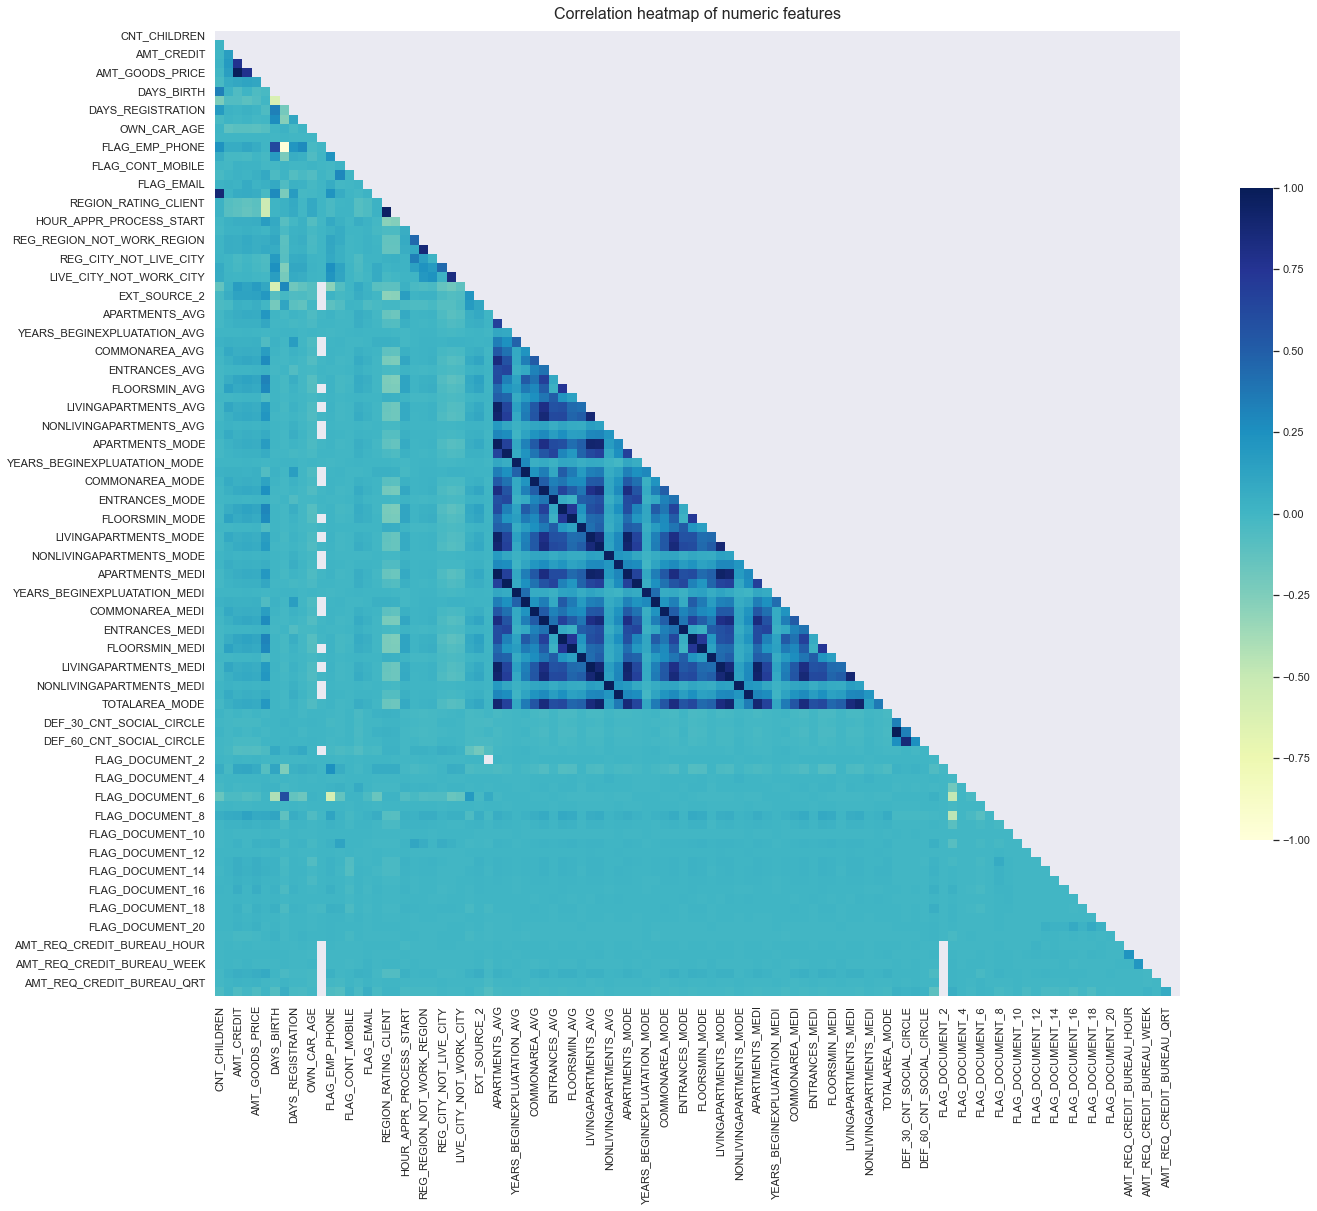

In [39]:
create_heatmap(application_train_numeric, "numeric features", (20, 20))

In [40]:
corr_matrix = application_train_numeric.iloc[:, 2:].corr(method="pearson")

In [41]:
threshold = 0.8
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

In [42]:
print(correlated_features)

{'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'CNT_FAM_MEMBERS', 'NONLIVINGAPARTMENTS_MEDI', 'ELEVATORS_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_MODE', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'COMMONAREA_MODE', 'FLAG_EMP_PHONE', 'NONLIVINGAPARTMENTS_MODE', 'AMT_GOODS_PRICE', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'TOTALAREA_MODE', 'ELEVATORS_AVG', 'LIVINGAREA_AVG', 'LIVE_REGION_NOT_WORK_REGION', 'FLOORSMIN_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MODE', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MEDI', 'ENTRANCES_MODE', 'NONLIVINGAREA_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'ELEVATORS_MEDI'}


In [43]:
len(correlated_features)

40

In [44]:
application_train_numeric["SK_ID_CURR"].astype(object).nunique()

307511

I have suspicious about some column, so I am going to investigate them.

1. employment length 'DAYS_EMPLOYED' - that should start from 0 and go to negative values.

In [45]:
(application_train_numeric["DAYS_EMPLOYED"] / 365).describe()

count    307511.000000
mean     174.835742   
std      387.056895   
min     -49.073973    
25%     -7.561644     
50%     -3.323288     
75%     -0.791781     
max      1000.665753  
Name: DAYS_EMPLOYED, dtype: float64

Employment length at that particular case can't be positive (and especially last 1000 years) so definately there are some data points included, which are improper.

In [46]:
application_train_numeric[(application_train_numeric["DAYS_EMPLOYED"] / 365) > 0][
    ["SK_ID_CURR", "TARGET", "DAYS_EMPLOYED"]
]

,SK_ID_CURR,TARGET,DAYS_EMPLOYED
8,100011,0,365243
11,100015,0,365243
23,100027,0,365243
38,100045,0,365243
43,100050,0,365243
...,...,...,...
307469,456209,0,365243
307483,456227,0,365243
307487,456231,0,365243
307505,456249,0,365243


In [47]:
application_train_numeric[(application_train_numeric["DAYS_EMPLOYED"] / 365) > 0][
    ["TARGET", "DAYS_EMPLOYED"]
].describe()

,TARGET,DAYS_EMPLOYED
count,55374.000000,55374.0
mean,0.053996,365243.0
std,0.226013,0.0
min,0.000000,365243.0
25%,0.000000,365243.0
50%,0.000000,365243.0
75%,0.000000,365243.0
max,1.000000,365243.0


In [48]:
application_train_numeric["DAYS_EMPLOYED"].isnull().sum()

0

In [49]:
application_train_numeric[(application_train_numeric["DAYS_EMPLOYED"] / 365) > 0][
    "TARGET"
].astype(object).value_counts()

0    52384
1    2990 
Name: TARGET, dtype: int64

Column 'DAYS_EMPLOYED' has 55374 rows with the same value which is 365243. In the same time that column has 0 null values. My suspicious is that this number represents fact, that employment length was not known at the time of application.

2. 'CNT_CHILDREN' column has outliers with the children number of 19, 14, 11, 10, 9 and 8.

In [50]:
application_train_numeric["CNT_CHILDREN"].astype(object).value_counts()

0     215371
1     61119 
2     26749 
3     3717  
4     429   
5     84    
6     21    
7     7     
14    3     
8     2     
9     2     
12    2     
10    2     
19    2     
11    1     
Name: CNT_CHILDREN, dtype: int64

I am going to check how distribution of number of children differs accross target variable/

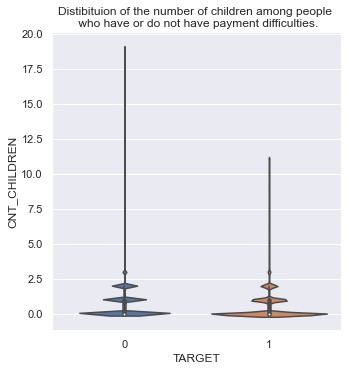

In [51]:
sns.catplot(data=application_train, x="TARGET", y="CNT_CHILDREN", kind="violin")
plt.title(
    "Distibituion of the number of children among people \n who have or do not have payment difficulties."
);


I cannot assume that is impossible to have 19 children, so I have to keep those numbers.

3. 'OWN_CAR_AGE' has some outliers too, I am going to check if that might be mistake or not.

In [52]:
application_train["OWN_CAR_AGE"].describe()

count    104582.000000
mean     12.061091    
std      11.944812    
min      0.000000     
25%      5.000000     
50%      9.000000     
75%      15.000000    
max      91.000000    
Name: OWN_CAR_AGE, dtype: float64

The oldest car is 91 years old. It is not impossible that someone owns a vintage car so this number is valid.

4. 'AMT_INCOME_TOTAL' - one very big amount is present, what disturb the general overview of the statistics of the rest of the data.

In [53]:
application_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
application_train[application_train["AMT_INCOME_TOTAL"] < 1000000][
    "AMT_INCOME_TOTAL"
].describe()

count    307261.000000
mean     167180.897131
std      89606.735342 
min      25650.000000 
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

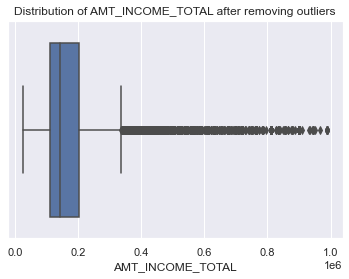

In [55]:
sns.boxplot(
    application_train[application_train["AMT_INCOME_TOTAL"] < 1000000][
        "AMT_INCOME_TOTAL"
    ]
)
plt.title("Distribution of AMT_INCOME_TOTAL after removing outliers");

In [56]:
application_train[application_train["AMT_INCOME_TOTAL"] >= 1000000][
    ["TARGET", "AMT_INCOME_TOTAL"]
].describe()

,TARGET,AMT_INCOME_TOTAL
count,250.000000,2.500000e+02
mean,0.052000,2.156189e+06
std,0.222472,7.454048e+06
min,0.000000,1.001826e+06
25%,0.000000,1.125000e+06
50%,0.000000,1.350000e+06
75%,0.000000,1.788750e+06
max,1.000000,1.170000e+08


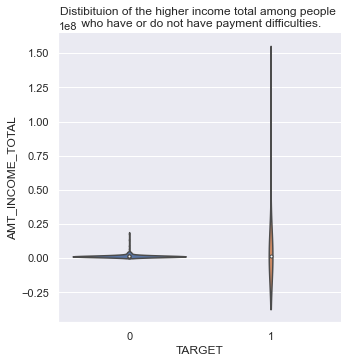

In [57]:
sns.catplot(
    data=application_train[application_train["AMT_INCOME_TOTAL"] >= 1000000],
    x="TARGET",
    y="AMT_INCOME_TOTAL",
    kind="violin",
)
plt.title(
    "Distibituion of the higher income total among people \n who have or do not have payment difficulties."
);

----
----
### **BUREAU DATASET**

-    Application data from previous loans that client got from other institutions and that were reported to Credit Bureau
-    External data concerning client's previous credics from other financial institutions
-    One row per one client's credit card in Credit Bureau (but client might have multiple cards)

In [58]:
bureau = pd.read_csv("bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [59]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


For the sake of claristy I am checking if values in 'SK_ID_BUREAU' are all unique and correspond with different credit cards.

In [60]:
bureau["SK_ID_BUREAU"].astype(object).nunique()

1716428

`bureau` dataset consists of 1,7mln rows and 17columns. 3 columns have object type, the rest are numeric.

In [61]:
show_column_description(dictionary, "bureau")

,Row,Description,Special
122,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
123,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
124,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,nan
125,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
127,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,nan
128,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
129,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
130,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),nan
131,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,nan


I need to identify which of the column might be informative in case of potential payment difficulties.

From column description, these columns are promising: 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE'.

In [62]:
bureau["SK_ID_CURR"].astype(object).nunique()

305811

In [63]:
bureau.isnull().sum().sort_values(ascending=False)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT         633653 
AMT_CREDIT_SUM_LIMIT      591780 
AMT_CREDIT_SUM_DEBT       257669 
DAYS_CREDIT_ENDDATE       105553 
AMT_CREDIT_SUM            13     
CREDIT_ACTIVE             0      
CREDIT_CURRENCY           0      
DAYS_CREDIT               0      
CREDIT_DAY_OVERDUE        0      
SK_ID_BUREAU              0      
CNT_CREDIT_PROLONG        0      
AMT_CREDIT_SUM_OVERDUE    0      
CREDIT_TYPE               0      
DAYS_CREDIT_UPDATE        0      
SK_ID_CURR                0      
dtype: int64

'AMT_CREDIT_MAX_OVERDUE' columnt has 1,1mln (out of 1,7mln) rows with missing values, however other promising columns have no missing values, so I'm going to investigate them more closely.

In [64]:
bureau[bureau.duplicated()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY


In [65]:
bureau.select_dtypes(include="object").head()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit


In [66]:
check_object_values(bureau.select_dtypes(include="object"), 0, 3)

CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']
Number of unique classes: 4
Number of missing values: 0


CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']
Number of unique classes: 4
Number of missing values: 0


CREDIT_TYPE
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
Number of unique classes: 15
Number of missing values: 0




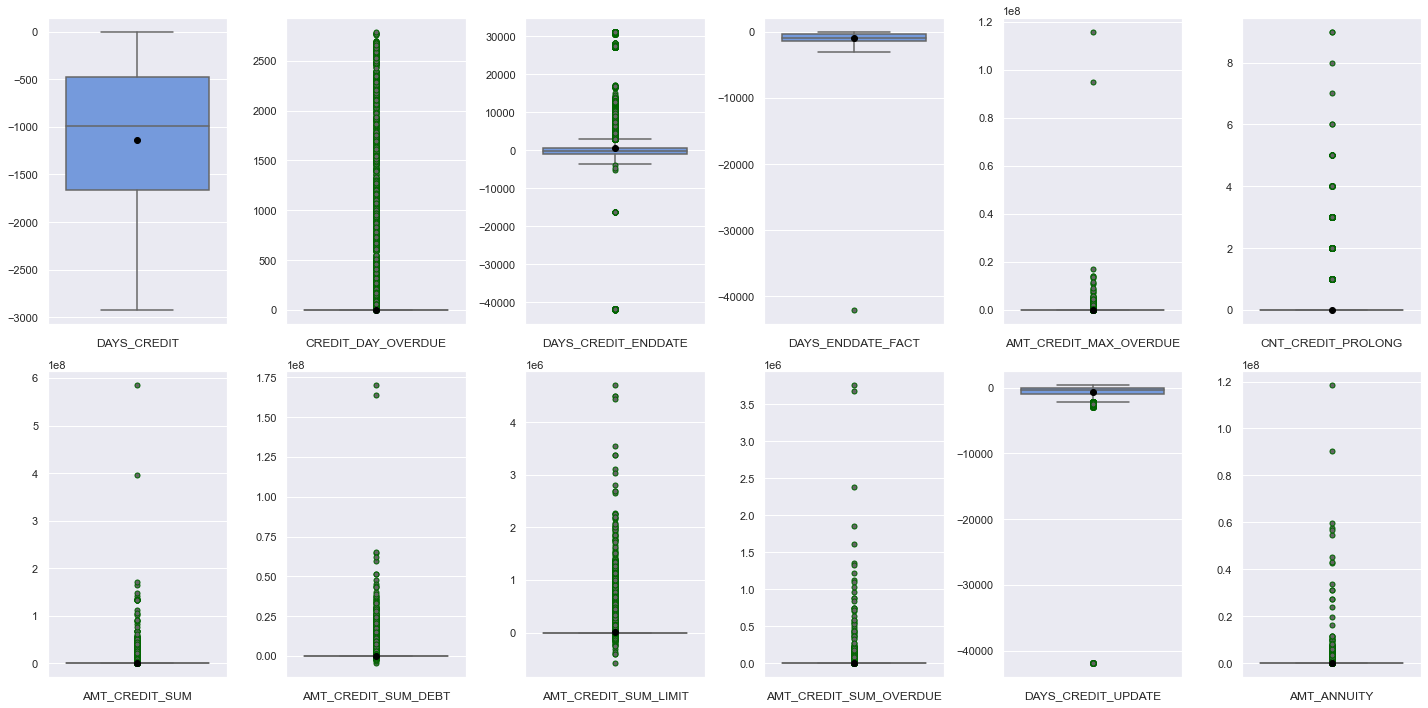

In [67]:
create_boxplots(bureau.select_dtypes(exclude="object"), 2, 6, (20, 10))

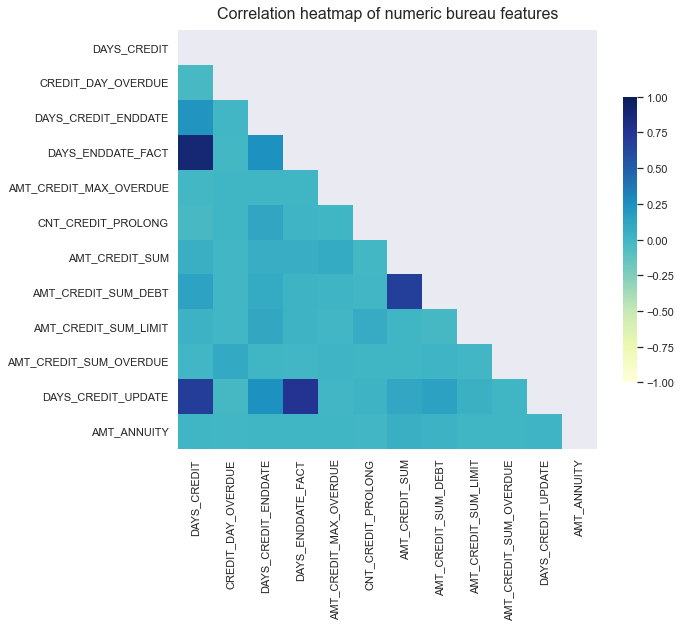

In [ ]:
create_heatmap(
    bureau.select_dtypes(exclude="object"), "numeric bureau features", (10, 10)
)

In [ ]:
bureau[bureau["DAYS_CREDIT_ENDDATE"] > 0][["CREDIT_ACTIVE", "DAYS_CREDIT_ENDDATE"]][
    "CREDIT_ACTIVE"
].value_counts()

Active      481147
Closed      119457
Sold        1998  
Bad debt    1     
Name: CREDIT_ACTIVE, dtype: int64

In [ ]:
bureau[["DAYS_ENDDATE_FACT", "DAYS_CREDIT_ENDDATE"]].apply(
    lambda x: x / 365
).sort_values(by="DAYS_ENDDATE_FACT", ascending=True)

,DAYS_ENDDATE_FACT,DAYS_CREDIT_ENDDATE
198346,-115.131507,-5.030137
1550542,-8.334247,0.202740
535407,-8.005479,-5.668493
1522679,-7.997260,-5.997260
1123734,-7.991781,-7.076712
...,...,...
1716404,NaN,2.731507
1716410,NaN,2.227397
1716412,NaN,0.019178
1716417,NaN,85.282192


In [56]:
bureau[["DAYS_ENDDATE_FACT", "DAYS_CREDIT_ENDDATE"]].apply(
    lambda x: x / 365
).sort_values(by="DAYS_CREDIT_ENDDATE", ascending=True)

,DAYS_ENDDATE_FACT,DAYS_CREDIT_ENDDATE
1277230,-2.139726,-115.232877
1064689,NaN,-115.221918
788968,-2.446575,-115.183562
789514,NaN,-115.183562
788969,-2.997260,-115.183562
...,...,...
1716324,NaN,NaN
1716351,NaN,NaN
1716384,NaN,NaN
1716396,-0.446575,NaN


In [57]:
bureau[(bureau["DAYS_CREDIT_ENDDATE"] / 365) < -50]["CREDIT_ACTIVE"].astype(
    object
).value_counts()

Closed    95
Active    39
Name: CREDIT_ACTIVE, dtype: int64

In [58]:
bureau[(bureau["DAYS_CREDIT_ENDDATE"] / 365) > 50]["CREDIT_ACTIVE"].astype(
    object
).value_counts()

Active    31576
Closed    6858 
Sold      20   
Name: CREDIT_ACTIVE, dtype: int64

In [59]:
bureau[(bureau["DAYS_CREDIT_ENDDATE"] / 365) > 0]["CREDIT_ACTIVE"].astype(
    object
).value_counts()

Active      481147
Closed      119457
Sold        1998  
Bad debt    1     
Name: CREDIT_ACTIVE, dtype: int64

In [69]:
bureau[(bureau["DAYS_CREDIT_ENDDATE"] / 365) <= 0]["CREDIT_ACTIVE"].astype(
    object
).value_counts()

Closed      927386
Active      76964 
Sold        3903  
Bad debt    19    
Name: CREDIT_ACTIVE, dtype: int64

In [70]:
grouped_info = (
    bureau.groupby("SK_ID_CURR")
    .agg(
        {
            "SK_ID_BUREAU": "count",
            "AMT_CREDIT_SUM": "sum",
            "CREDIT_DAY_OVERDUE": "sum",
            "CNT_CREDIT_PROLONG": "sum",
            "AMT_CREDIT_SUM_OVERDUE": "sum",
        }
    )
    .rename(
        columns={
            "SK_ID_BUREAU": "NUMBER_OF_PREVIOUS_CREDITS",
            "AMT_CREDIT_SUM": "AMT_CREDIT_TOTAL_SUM",
            "CREDIT_DAY_OVERDUE": "TOTAL_COUNT_DAYS_OVERDUE",
            "CNT_CREDIT_PROLONG": "TOTAL_CREDITS_PROLONGED",
        }
    )
    .sort_values(
        by=["NUMBER_OF_PREVIOUS_CREDITS", "TOTAL_COUNT_DAYS_OVERDUE"], ascending=False
    )
    .reset_index()
)

In [71]:
grouped_info[grouped_info["TOTAL_CREDITS_PROLONGED"] > 0].sort_values(
    "TOTAL_CREDITS_PROLONGED", ascending=False
)

,SK_ID_CURR,NUMBER_OF_PREVIOUS_CREDITS,AMT_CREDIT_TOTAL_SUM,TOTAL_COUNT_DAYS_OVERDUE,TOTAL_CREDITS_PROLONGED,AMT_CREDIT_SUM_OVERDUE
19363,172552,13,4091404.500,0,9,0.0
6050,321549,18,6090126.210,0,9,0.0
126699,140257,5,2294649.000,0,8,0.0
56465,305339,9,4738428.000,0,7,0.0
120436,417724,6,3147498.000,0,6,0.0
...,...,...,...,...,...,...
55279,271301,9,3050445.645,0,1,0.0
55259,270785,9,6814883.790,0,1,0.0
55243,270342,9,3450267.000,0,1,0.0
55190,269047,9,4199494.500,0,1,0.0


----
----
### **BUREAU_BALANCE DATASET**

-   Monthly balance of credits in Credit Bureau
-   Each row is one month of previous credit and a single previous card might have information from multiple months
-   Behavioral data

In [72]:
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [73]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


I am checking how many unique values exist in column 'SK_ID_BUREAU'.

In [74]:
bureau_balance["SK_ID_BUREAU"].astype(object).nunique()

817395

In this dataset I do not have information about all credit cards that exist in `bureau` dataset.

In [75]:
show_column_description(dictionary, "bureau_balance")

,Row,Description,Special
139,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table,hashed
140,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
141,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )",nan


In [76]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

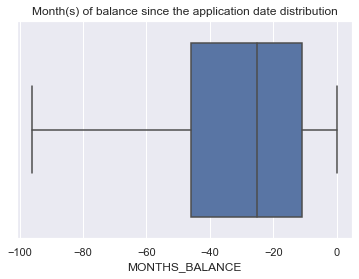

In [77]:
sns.boxplot(data=bureau_balance, x="MONTHS_BALANCE")
plt.title("Month(s) of balance since the application date distribution");


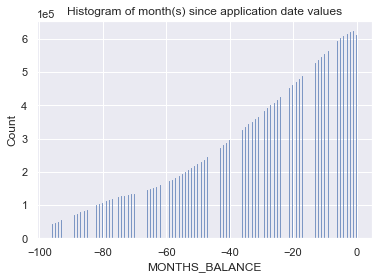

In [78]:
ax = sns.histplot(data=bureau_balance, x="MONTHS_BALANCE")
plt.title("Histogram of month(s) since application date values")
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

In [79]:
check_object_values(bureau_balance, 2, 3)

STATUS
['C' '0' 'X' '1' '2' '3' '5' '4']
Number of unique classes: 8
Number of missing values: 0




In [80]:
bureau_balance["STATUS"].value_counts().sort_values(ascending=False)

C    13646993
0    7499507 
X    5810482 
1    242347  
5    62406   
2    23419   
3    8924    
4    5847    
Name: STATUS, dtype: int64

In [81]:
bb_bal = (
    bureau_balance.groupby(["SK_ID_BUREAU", "STATUS"])
    .agg({"MONTHS_BALANCE": "count"})
    .reset_index("STATUS")
)
bb_bal

,STATUS,MONTHS_BALANCE
SK_ID_BUREAU,,
5001709,C,86
5001709,X,11
5001710,0,5
5001710,C,48
5001710,X,30
...,...,...
6842887,0,6
6842887,C,31
6842888,0,9


In [82]:
bb_bal["STATUS_NUM"] = bb_bal["STATUS"].replace({"C": -1, "X": -0.01}).astype(float64)
bb_bal["TRUST_INDICATOR"] = bb_bal["STATUS_NUM"] * bb_bal["MONTHS_BALANCE"]

In [83]:
balance_to_merge = (
    bb_bal.groupby("SK_ID_BUREAU")
    .agg({"TRUST_INDICATOR": "sum"})
    .sort_values("TRUST_INDICATOR", ascending=False)
    .reset_index()
)

In [84]:
balance_to_merge


,SK_ID_BUREAU,TRUST_INDICATOR
0,5931486,485.0
1,6051262,485.0
2,5941006,485.0
3,5744002,482.0
4,5609996,481.0
...,...,...
817390,5789909,-97.0
817391,6208930,-97.0
817392,5059989,-97.0
817393,6209112,-97.0


MERGING OF **BUREAU** AND **BUREAU_BALANCE** (after feature engineering) DATASETS.

In [85]:
bureau_full = bureau.merge(balance_to_merge, how="left", on="SK_ID_BUREAU")
bureau_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  TRUST_INDICATOR         float64
dtypes: float64(9), int64(6), object(3)
memory usage: 248.8+ MB


In [86]:
bureau_full["TRUST_INDICATOR"].describe()

count    774354.000000
mean    -14.256459    
std      21.935064    
min     -96.000000    
25%     -24.010000    
50%     -3.000000     
75%     -0.020000     
max      444.990000   
Name: TRUST_INDICATOR, dtype: float64

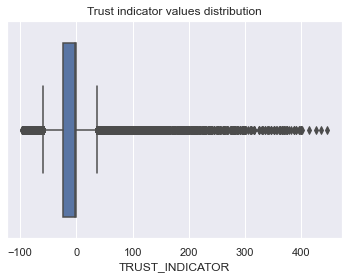

In [87]:
sns.boxplot(bureau_full["TRUST_INDICATOR"])
plt.title("Trust indicator values distribution");

In [88]:
ftrs_to_class = (
    bureau_full.groupby("SK_ID_CURR")
    .agg(
        {
            "SK_ID_BUREAU": "count",
            "AMT_CREDIT_SUM": "sum",
            "CREDIT_DAY_OVERDUE": "sum",
            "CNT_CREDIT_PROLONG": "sum",
            "AMT_CREDIT_SUM_OVERDUE": "sum",
            "TRUST_INDICATOR": "max",
        }
    )
    .rename(
        columns={
            "SK_ID_BUREAU": "NUMBER_OF_PREVIOUS_CREDITS",
            "AMT_CREDIT_SUM": "AMT_CREDIT_TOTAL_SUM",
            "CREDIT_DAY_OVERDUE": "TOTAL_COUNT_DAYS_OVERDUE",
            "CNT_CREDIT_PROLONG": "TOTAL_CREDITS_PROLONGED",
        }
    )
    .sort_values(
        by=["NUMBER_OF_PREVIOUS_CREDITS", "TOTAL_COUNT_DAYS_OVERDUE"], ascending=False
    )
    .reset_index()
)

In [89]:
def flag_column(row):
    if (
        (row["TOTAL_COUNT_DAYS_OVERDUE"] == 0)
        & (row["TOTAL_CREDITS_PROLONGED"] == 0)
        & (row["AMT_CREDIT_SUM_OVERDUE"] == 0)
    ):
        val = 0
    else:
        val = 1
    return val

In [90]:
ftrs_to_class["FLAG_1_OVERDUE"] = ftrs_to_class.apply(flag_column, axis=1)
ftrs_to_class

,SK_ID_CURR,NUMBER_OF_PREVIOUS_CREDITS,AMT_CREDIT_TOTAL_SUM,TOTAL_COUNT_DAYS_OVERDUE,TOTAL_CREDITS_PROLONGED,AMT_CREDIT_SUM_OVERDUE,TRUST_INDICATOR,FLAG_1_OVERDUE
0,120860,116,9227762.055,0,0,0.0,3.99,0
1,169704,94,8288793.810,0,1,0.0,NaN,1
2,318065,78,7622383.905,0,0,0.0,0.00,0
3,251643,61,2906545.860,0,0,45.0,0.00,1
4,425396,60,1746000.000,0,0,0.0,-0.01,0
...,...,...,...,...,...,...,...,...
305806,456229,1,258750.000,0,1,0.0,NaN,1
305807,456233,1,282663.315,0,0,0.0,0.00,0
305808,456237,1,98145.000,0,0,0.0,NaN,0
305809,456242,1,198000.000,0,0,0.0,0.00,0


In [91]:
ftrs_to_class.to_csv("features_bureau.csv")

----
----
### **PREVIOUS_APPLICATION DATASET** 

-    Application data of client's previous loans in Home Credit 
-    Info about the previous loan parameters and client info at time of previous application
-    One row per previous application

In [92]:
previous_application = pd.read_csv("previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
show_column_description(dictionary, "previous_application")

,Row,Description,Special
173,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
174,SK_ID_CURR,ID of loan in our sample,hashed
175,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",nan
176,AMT_ANNUITY,Annuity of previous application,nan
177,AMT_APPLICATION,For how much credit did client ask on the previous application,nan
178,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",nan
179,AMT_DOWN_PAYMENT,Down payment on the previous application,nan
180,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,nan
181,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,nan
182,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [95]:
previous_application.isnull().sum().sort_values(ascending=False)[:18]

RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT             895844 
RATE_DOWN_PAYMENT            895844 
NAME_TYPE_SUITE              820405 
NFLAG_INSURED_ON_APPROVAL    673065 
DAYS_TERMINATION             673065 
DAYS_LAST_DUE                673065 
DAYS_LAST_DUE_1ST_VERSION    673065 
DAYS_FIRST_DUE               673065 
DAYS_FIRST_DRAWING           673065 
AMT_GOODS_PRICE              385515 
AMT_ANNUITY                  372235 
CNT_PAYMENT                  372230 
PRODUCT_COMBINATION          346    
AMT_CREDIT                   1      
NAME_YIELD_GROUP             0      
NAME_PORTFOLIO               0      
dtype: int64

In [96]:
previous_application.iloc[:, 2:].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


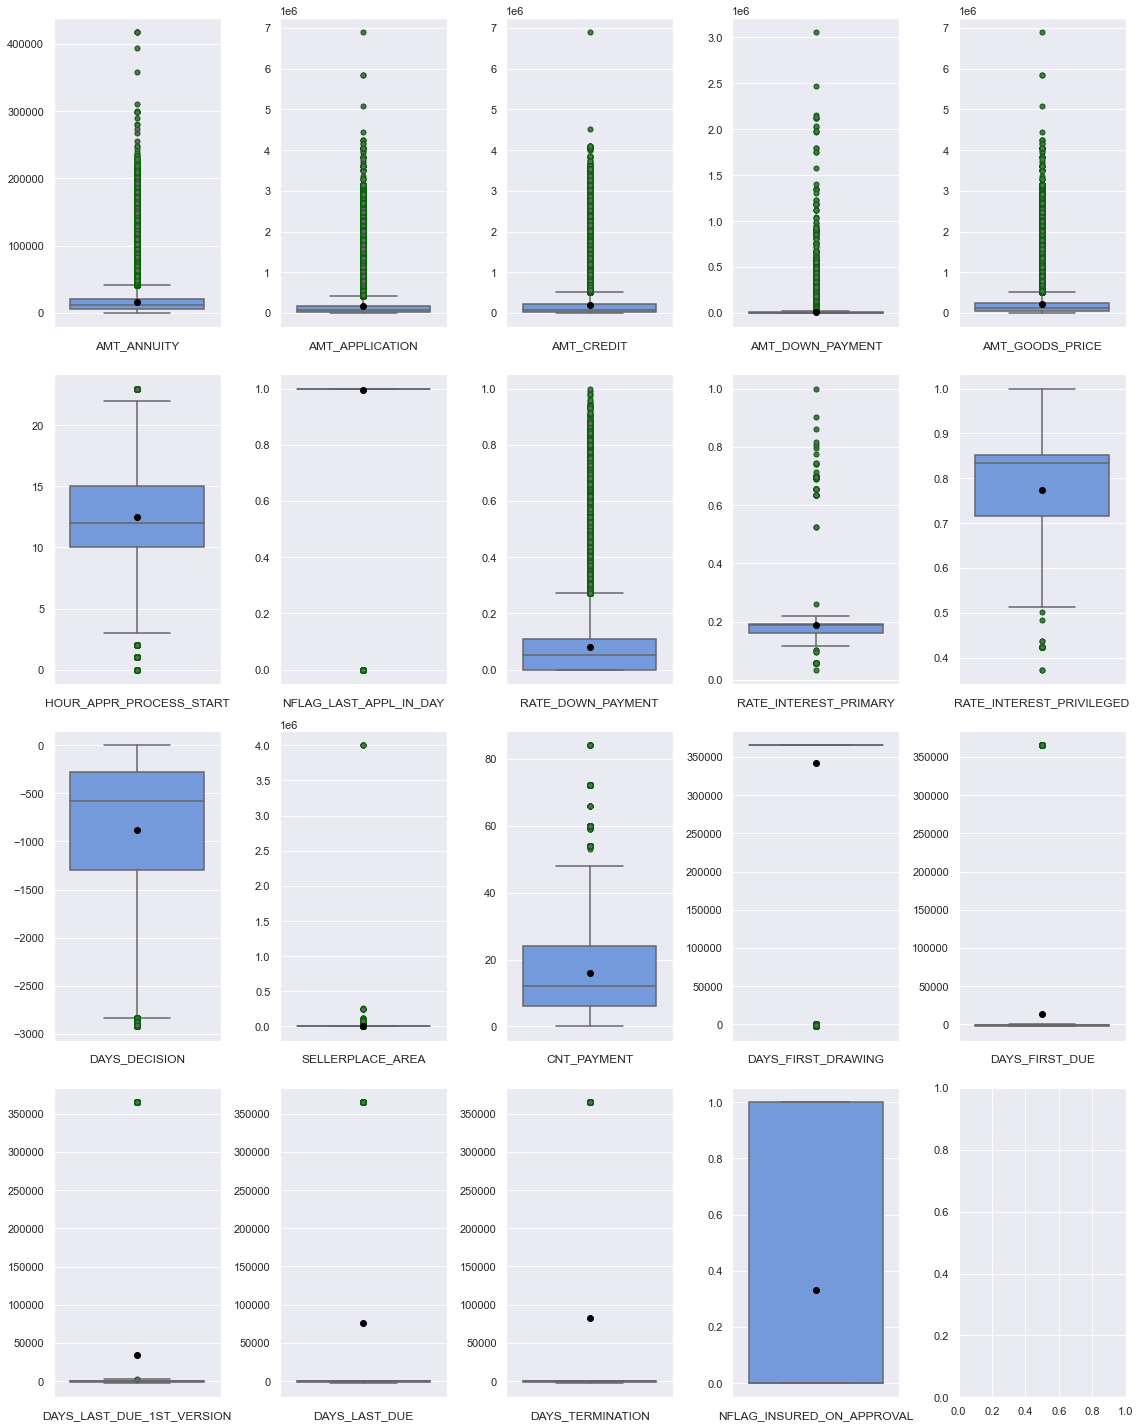

In [97]:
create_boxplots(previous_application.select_dtypes(exclude="object"), 4, 5, (16, 20))

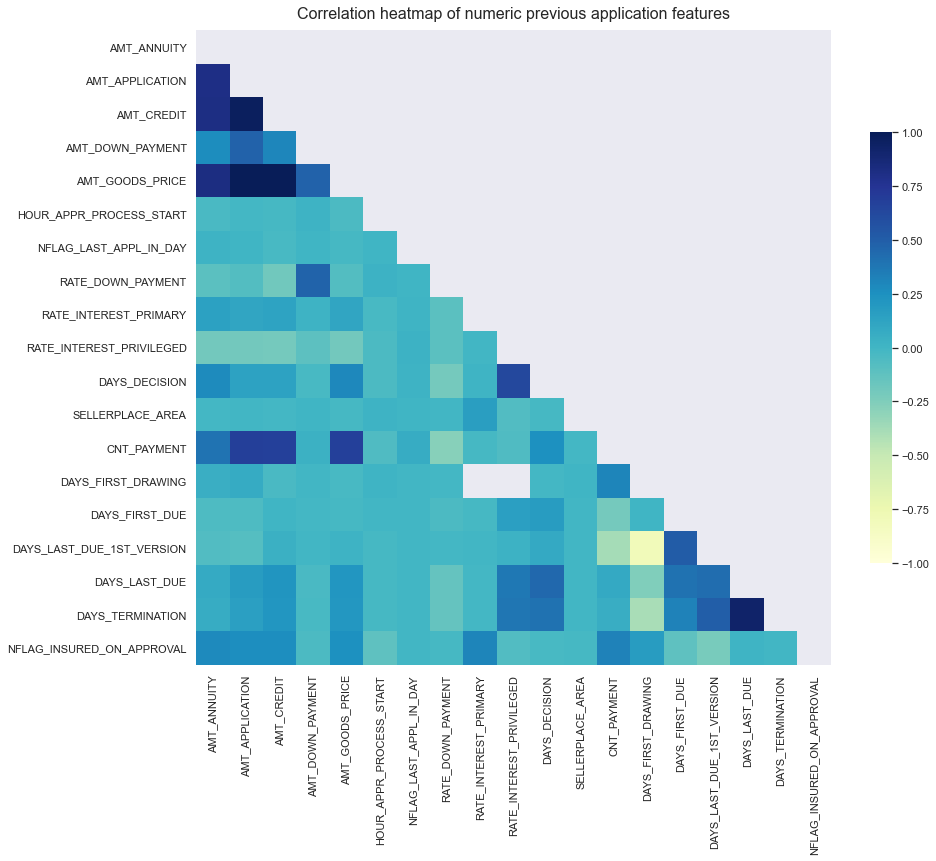

In [98]:
create_heatmap(
    previous_application.select_dtypes(exclude="object"),
    "numeric previous application features",
    (14, 14),
)

In [99]:
check_object_values(previous_application.select_dtypes(include="object"), 0, 3)

NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
Number of unique classes: 4
Number of missing values: 0


WEEKDAY_APPR_PROCESS_START
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
Number of unique classes: 7
Number of missing values: 0


FLAG_LAST_APPL_PER_CONTRACT
['Y' 'N']
Number of unique classes: 2
Number of missing values: 0




In [100]:
check_object_values(previous_application.select_dtypes(include="object"), 3, 6)

NAME_CASH_LOAN_PURPOSE
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
Number of unique classes: 25
Number of missing values: 0


NAME_CONTRACT_STATUS
['Approved' 'Refused' 'Canceled' 'Unused offer']
Number of unique classes: 4
Number of missing values: 0


NAME_PAYMENT_TYPE
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
Number of unique classes: 4
Number of missing values: 0




In [101]:
check_object_values(previous_application.select_dtypes(include="object"), 6, 9)

CODE_REJECT_REASON
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
Number of unique classes: 9
Number of missing values: 0


NAME_TYPE_SUITE
[nan 'Unaccompanied' 'Spouse, partner' 'Family' 'Children' 'Other_B'
 'Other_A' 'Group of people']
Number of unique classes: 8
Number of missing values: 820405


NAME_CLIENT_TYPE
['Repeater' 'New' 'Refreshed' 'XNA']
Number of unique classes: 4
Number of missing values: 0




**Description of codes from 'code_reject_reason' column:**

XAP: Application approved

HC: Home Credit has contacted the client for additional information

LIMIT: Loan amount requested by the client exceeds the limit for the loan product

SCO: Client did not meet the requirements for the loan product

SCOFR: Client did not meet the requirements for the loan product in France

SYSTEM: Application was rejected by the automated scoring system

VERIF: Verification of the information provided by the client was unsuccessful

CLIENT: Client cancelled the application during the approval process

SELLER: Application was rejected by the seller

**XAP** code indicates that the loan application was approved, not rejected.

In [102]:
check_object_values(previous_application.select_dtypes(include="object"), 9, 12)

NAME_GOODS_CATEGORY
['Mobile' 'XNA' 'Consumer Electronics' 'Construction Materials'
 'Auto Accessories' 'Photo / Cinema Equipment' 'Computers' 'Audio/Video'
 'Medicine' 'Clothing and Accessories' 'Furniture' 'Sport and Leisure'
 'Homewares' 'Gardening' 'Jewelry' 'Vehicles' 'Education'
 'Medical Supplies' 'Other' 'Direct Sales' 'Office Appliances' 'Fitness'
 'Tourism' 'Insurance' 'Additional Service' 'Weapon' 'Animals'
 'House Construction']
Number of unique classes: 28
Number of missing values: 0


NAME_PORTFOLIO
['POS' 'Cash' 'XNA' 'Cards' 'Cars']
Number of unique classes: 5
Number of missing values: 0


NAME_PRODUCT_TYPE
['XNA' 'x-sell' 'walk-in']
Number of unique classes: 3
Number of missing values: 0




In [103]:
check_object_values(previous_application.select_dtypes(include="object"), 12, 15)

CHANNEL_TYPE
['Country-wide' 'Contact center' 'Credit and cash offices' 'Stone'
 'Regional / Local' 'AP+ (Cash loan)' 'Channel of corporate sales'
 'Car dealer']
Number of unique classes: 8
Number of missing values: 0


NAME_SELLER_INDUSTRY
['Connectivity' 'XNA' 'Consumer electronics' 'Industry' 'Clothing'
 'Furniture' 'Construction' 'Jewelry' 'Auto technology' 'MLM partners'
 'Tourism']
Number of unique classes: 11
Number of missing values: 0


NAME_YIELD_GROUP
['middle' 'low_action' 'high' 'low_normal' 'XNA']
Number of unique classes: 5
Number of missing values: 0




In [104]:
check_object_values(previous_application.select_dtypes(include="object"), 15, 17)

PRODUCT_COMBINATION
['POS mobile with interest' 'Cash X-Sell: low' 'Cash X-Sell: high'
 'Cash X-Sell: middle' 'Cash Street: high' 'Cash'
 'POS household without interest' 'POS household with interest'
 'POS other with interest' 'Card X-Sell' 'POS mobile without interest'
 'Card Street' 'POS industry with interest' 'Cash Street: low'
 'POS industry without interest' 'Cash Street: middle'
 'POS others without interest' nan]
Number of unique classes: 18
Number of missing values: 346




In [105]:
previous_application[
    [
        "DAYS_FIRST_DRAWING",
        "DAYS_FIRST_DUE",
        "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE",
        "DAYS_TERMINATION",
    ]
].apply(lambda x: x / 365).describe()


,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,937.561247,37.880190,92.514449,209.814803,224.636558
std,243.605797,198.479095,292.758999,409.992918,420.009635
min,-8.005479,-7.923288,-7.673973,-7.915068,-7.873973
25%,1000.665753,-4.460274,-3.402740,-3.600000,-3.479452
50%,1000.665753,-2.276712,-0.989041,-1.471233,-1.367123
75%,1000.665753,-1.126027,0.353425,-0.202740,-0.120548
max,1000.665753,1000.665753,1000.665753,1000.665753,1000.665753


In [106]:
previous_application[
    [
        "DAYS_FIRST_DRAWING",
        "DAYS_FIRST_DUE",
        "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE",
        "DAYS_TERMINATION",
    ]
].apply(lambda x: x / 365).isnull().sum()


DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION             673065
dtype: int64

All columns have equal number of missing values. Values '1000' looks like they were introduced any time the data was not provided.

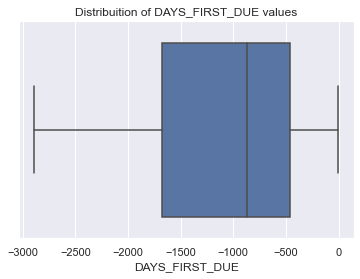

In [107]:
sns.boxplot(
    x=previous_application[previous_application["DAYS_FIRST_DUE"] < 100][
        "DAYS_FIRST_DUE"
    ]
)
plt.title("Distribuition of DAYS_FIRST_DUE values");

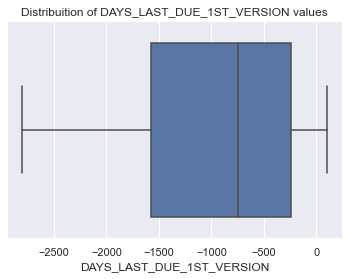

In [108]:
sns.boxplot(
    x=previous_application[previous_application["DAYS_LAST_DUE_1ST_VERSION"] < 100][
        "DAYS_LAST_DUE_1ST_VERSION"
    ]
)
plt.title("Distribuition of DAYS_LAST_DUE_1ST_VERSION values");

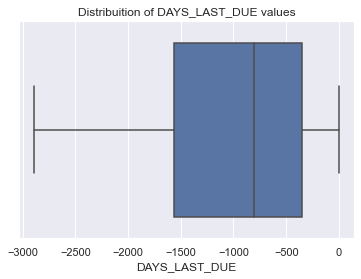

In [109]:
sns.boxplot(
    x=previous_application[previous_application["DAYS_LAST_DUE"] < 100]["DAYS_LAST_DUE"]
)
plt.title("Distribuition of DAYS_LAST_DUE values");

In [110]:
prev_agg = (
    previous_application[previous_application["CODE_REJECT_REASON"] == "XAP"]
    .groupby("SK_ID_CURR")
    .agg(
        {
            "SK_ID_PREV": "count",
            "AMT_CREDIT": "sum",
            "DAYS_FIRST_DUE": "min",
            "DAYS_LAST_DUE_1ST_VERSION": "min",
            "DAYS_LAST_DUE": "min",
        }
    )
    .rename(columns={"AMT_CREDIT": "TOTAL_AMT_OF_PREV_CREDITS"})
)

In [111]:
prev_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338151 entries, 100001 to 456255
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 338151 non-null  int64  
 1   TOTAL_AMT_OF_PREV_CREDITS  338151 non-null  float64
 2   DAYS_FIRST_DUE             337339 non-null  float64
 3   DAYS_LAST_DUE_1ST_VERSION  337339 non-null  float64
 4   DAYS_LAST_DUE              337339 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 15.5 MB


----
----
### **INSTALLMENTS_PAYMENTS DATASET**

-    Past payment data for each installments of previous credits in Home Credit related to loans in the sample
-    Behavioral data

In [112]:
installments_payments = pd.read_csv("installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [113]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [114]:
show_column_description(dictionary, "installments_payments")

,Row,Description,Special
211,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
212,SK_ID_CURR,ID of loan in our sample,hashed
213,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed,nan
214,NUM_INSTALMENT_NUMBER,On which installment we observe payment,nan
215,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
216,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
217,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,nan
218,AMT_PAYMENT,What the client actually paid on previous credit on this installment,nan


In [115]:
installments_payments.isnull().sum()

SK_ID_PREV                0   
SK_ID_CURR                0   
NUM_INSTALMENT_VERSION    0   
NUM_INSTALMENT_NUMBER     0   
DAYS_INSTALMENT           0   
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT            0   
AMT_PAYMENT               2905
dtype: int64

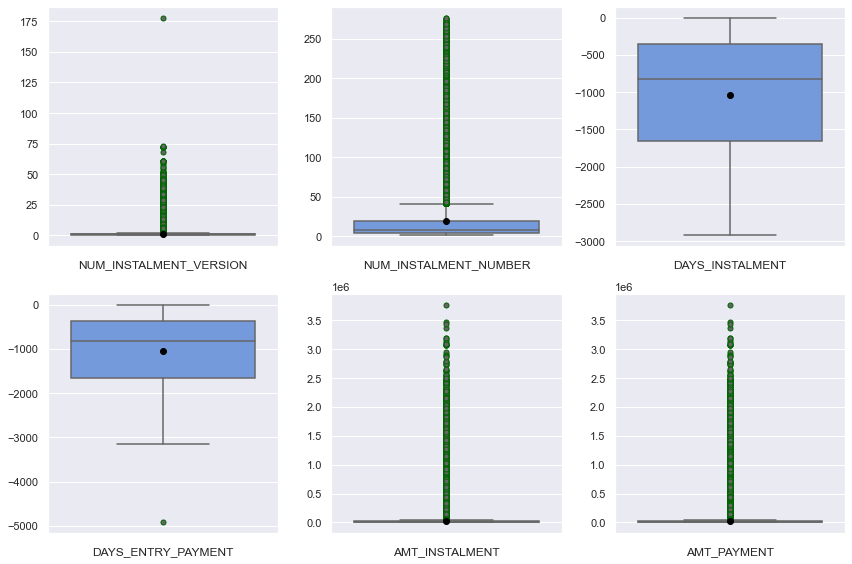

In [116]:
create_boxplots(installments_payments, 2, 3, (12, 8))

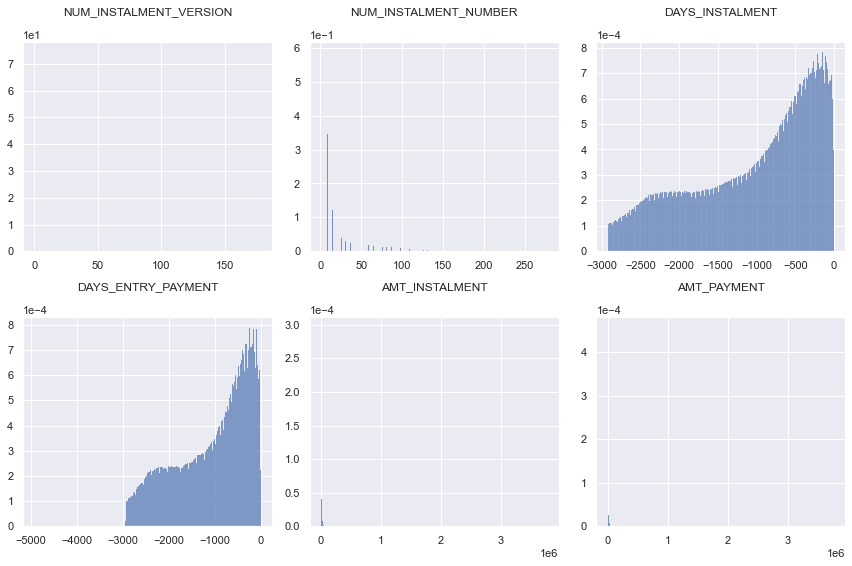

In [118]:
plot_histograms(installments_payments, 2, 3, (12, 8), hue=None)

In [119]:
installments_payments.describe()


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [120]:
amt_ins_pay = installments_payments[
    (installments_payments["AMT_INSTALMENT"] < 17000)
    & (installments_payments["AMT_PAYMENT"] < 17000)
][["SK_ID_PREV", "SK_ID_CURR", "AMT_INSTALMENT", "AMT_PAYMENT"]]
amt_ins_pay.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_INSTALMENT,AMT_PAYMENT
count,1.022227e+07,1.022227e+07,1.022227e+07,1.022227e+07
mean,1.902113e+06,2.783550e+05,6.759212e+03,6.389905e+03
std,5.362792e+05,1.027210e+05,4.634693e+03,4.693306e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00
25%,1.431982e+06,1.895910e+05,3.102255e+03,2.321910e+03
50%,1.895029e+06,2.784300e+05,6.393555e+03,5.861340e+03
75%,2.366860e+06,3.674010e+05,1.011577e+04,9.707445e+03
max,2.843499e+06,4.562550e+05,1.699997e+04,1.699997e+04


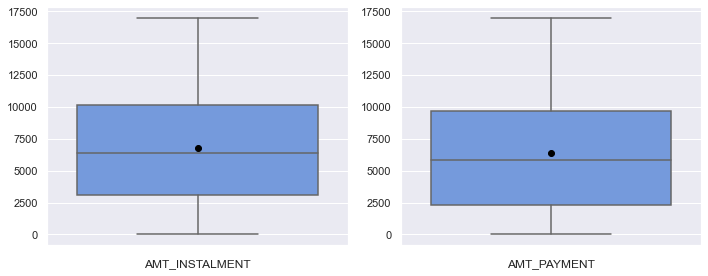

In [121]:
create_boxplots(amt_ins_pay, 1, 2, (10, 4))


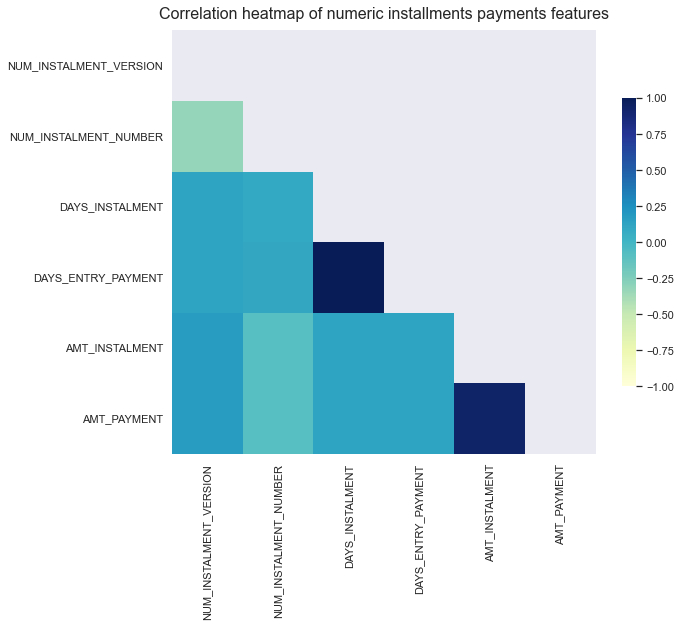

In [122]:
create_heatmap(
    installments_payments, "numeric installments payments features", (10, 10)
)

In [123]:
installments_payments = installments_payments.dropna()


I am going to prepare a shortened dataframe that stores information about the total amount of the money that a borrower borrowed previously and were supposed to give back, the total amount that finally was paid, total number of installment and payment ratio.

In [124]:
installment_summary = (
    installments_payments.groupby("SK_ID_CURR")
    .agg(
        {
            "AMT_INSTALMENT": "sum",
            "AMT_PAYMENT": "sum",
            "NUM_INSTALMENT_NUMBER": "count",
        }
    )
    .sort_values("AMT_INSTALMENT", ascending=False)
)


Payment ratio is a column that gives information what amount of money a person paid divided by the amount that a person was supposed to pay.

In [125]:
installment_summary["PAYMENT_RATIO"] = (
    installment_summary["AMT_PAYMENT"] / installment_summary["AMT_INSTALMENT"]
)

In [126]:
installment_summary = installment_summary.rename(
    columns={
        "AMT_INSTALMENT": "TOTAL_PAYMENT_AGREEMENT",
        "AMT_PAYMENT": "TOTAL_PAYMENT_ACTUAL",
    }
)

In [127]:
installment_summary.head()


,TOTAL_PAYMENT_AGREEMENT,TOTAL_PAYMENT_ACTUAL,NUM_INSTALMENT_NUMBER,PAYMENT_RATIO
SK_ID_CURR,,,,
149858,3.247978e+07,3.268928e+07,189,1.006450
381219,2.327473e+07,2.553705e+07,79,1.097201
166573,1.924476e+07,1.878042e+07,271,0.975872
348429,1.694176e+07,1.678127e+07,289,0.990527
228958,1.662649e+07,1.662649e+07,137,1.000000


In [128]:
prev_appl_install = prev_agg.merge(installment_summary, on="SK_ID_CURR")
prev_appl_install.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337425 entries, 100001 to 456255
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 337425 non-null  int64  
 1   TOTAL_AMT_OF_PREV_CREDITS  337425 non-null  float64
 2   DAYS_FIRST_DUE             336920 non-null  float64
 3   DAYS_LAST_DUE_1ST_VERSION  336920 non-null  float64
 4   DAYS_LAST_DUE              336920 non-null  float64
 5   TOTAL_PAYMENT_AGREEMENT    337425 non-null  float64
 6   TOTAL_PAYMENT_ACTUAL       337425 non-null  float64
 7   NUM_INSTALMENT_NUMBER      337425 non-null  int64  
 8   PAYMENT_RATIO              337425 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 25.7 MB


In [129]:
prev_appl_install.to_csv("prev_appl_install.csv")

----
----
### **CREDIT_CARD_BALANCE**

-   Monthly balance of client's previous credit card loans in Home Credit
-   Behavioral data

In [130]:
credit_card_balance = pd.read_csv("credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [131]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [132]:
show_column_description(dictionary, "credit_card_balance")

,Row,Description,Special
150,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
151,SK_ID_CURR,ID of loan in our sample,hashed
152,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
153,AMT_BALANCE,Balance during the month of previous credit,nan
154,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,nan
155,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,nan
156,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,nan
157,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,nan
158,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,nan
159,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,nan


In [133]:
credit_card_balance.isnull().sum().sort_values(ascending=False)

AMT_PAYMENT_CURRENT           767988
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236
SK_ID_PREV                    0     
AMT_TOTAL_RECEIVABLE          0     
SK_DPD                        0     
NAME_CONTRACT_STATUS          0     
CNT_DRAWINGS_CURRENT          0     
AMT_PAYMENT_TOTAL_CURRENT     0     
AMT_RECIVABLE                 0     
AMT_RECEIVABLE_PRINCIPAL      0     
SK_ID_CURR                    0     
AMT_DRAWINGS_CURRENT          0     
AMT_CREDIT_LIMIT_ACTUAL       0     
AMT_BALANCE                   0     
MONTHS_BALANCE                0     
SK_DPD_DEF                    0     
dtype: int64

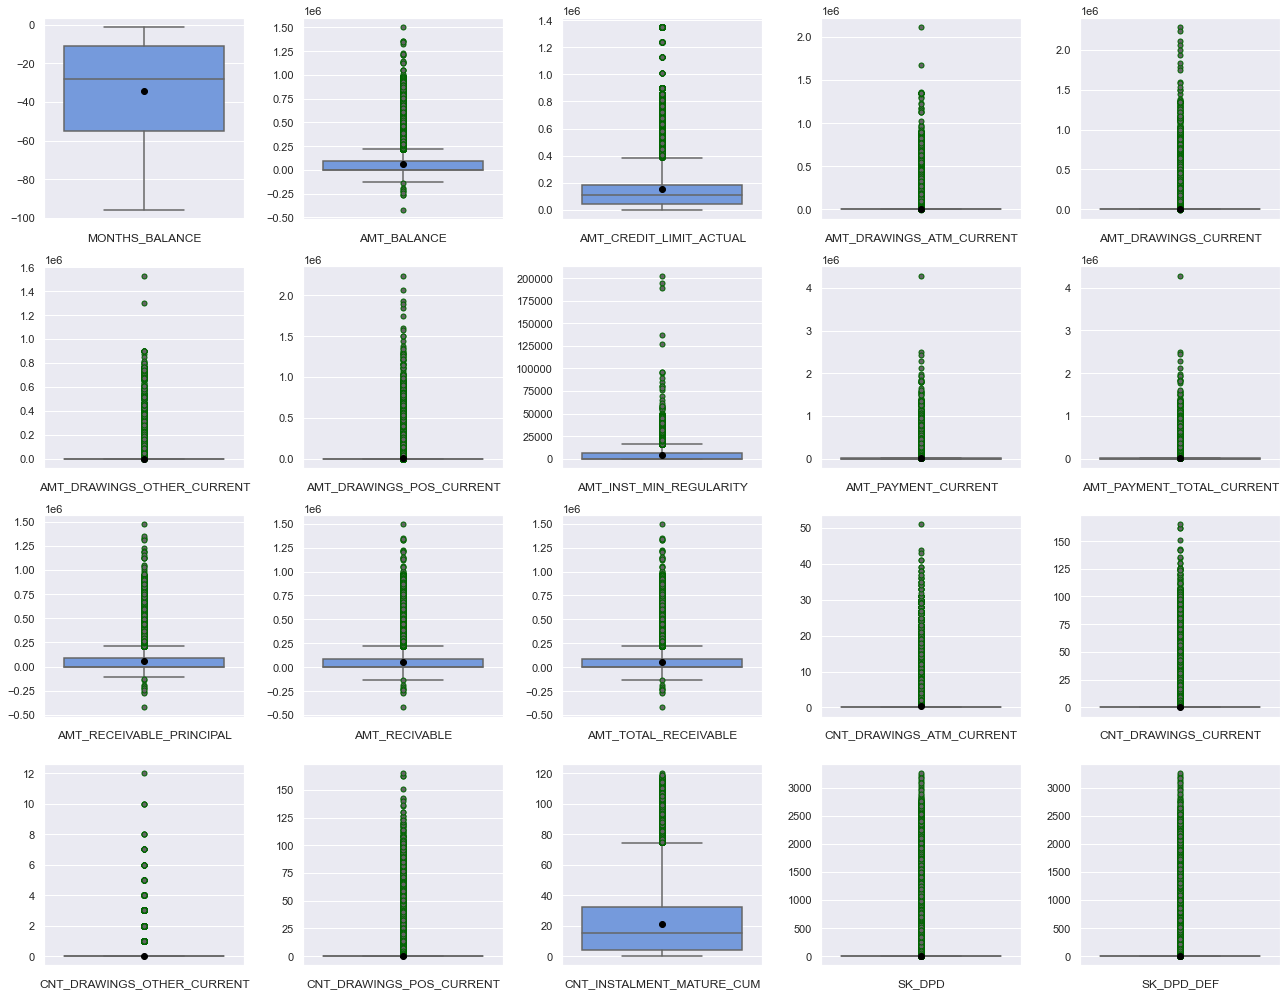

In [134]:
create_boxplots(credit_card_balance.select_dtypes(exclude="object"), 4, 5, (18, 14))

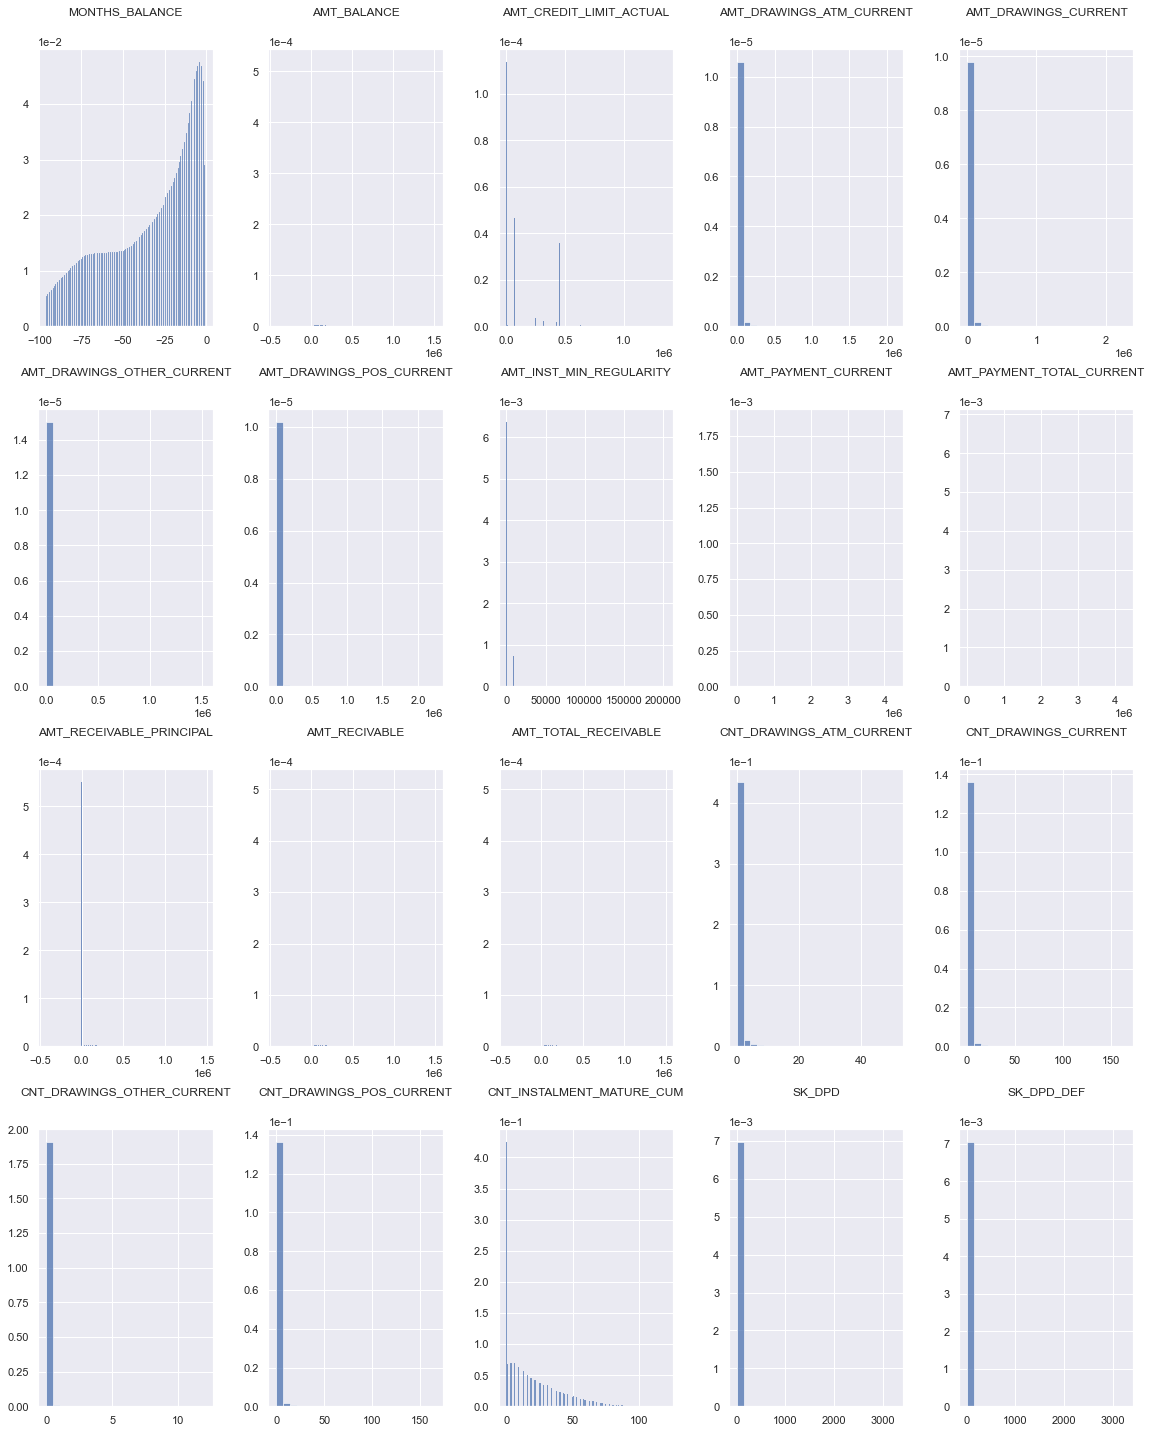

In [135]:
plot_histograms(credit_card_balance.select_dtypes(exclude="object"), 4, 5, (16, 20), hue=None)

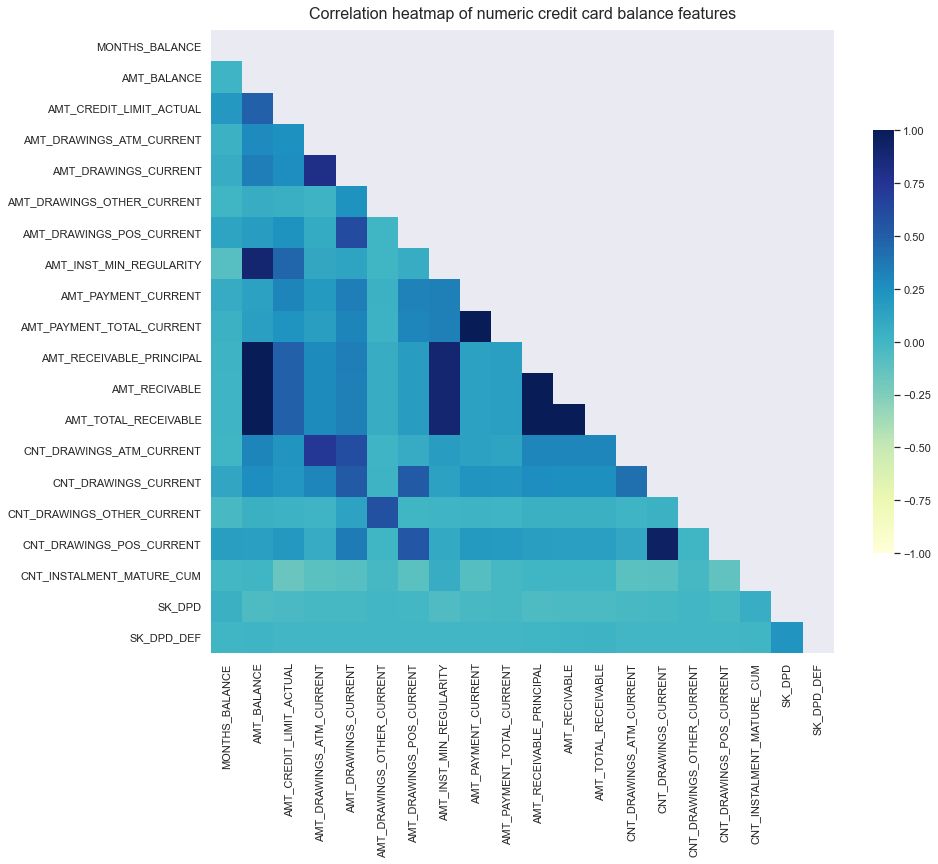

In [136]:
create_heatmap(
    credit_card_balance.select_dtypes(exclude="object"),
    "numeric credit card balance features",
    (14, 14),
)

Columns 'SK_DPD' and 'SK_DPD_DEF' have some significant outliers, so I am going to take a look if that values are inserted by the mistake, or if that values are proper.

In [137]:
credit_card_balance[["SK_DPD", "SK_DPD_DEF"]].describe()

,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06
mean,9.283667e+00,3.316220e-01
std,9.751570e+01,2.147923e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.260000e+03,3.260000e+03


In [138]:
credit_card_balance[(credit_card_balance["SK_DPD_DEF"] / 365) > 5][
    ["SK_ID_PREV", "NAME_CONTRACT_STATUS", "SK_DPD", "SK_DPD_DEF"]
].sort_values(by="SK_DPD_DEF", ascending=False)

,SK_ID_PREV,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1416169,2709729,Demand,3260,3260
1047802,2709729,Demand,3229,3229
805693,2709729,Demand,3198,3198
1533960,2709729,Demand,3168,3168
1060812,2709729,Demand,3137,3137
...,...,...,...,...
1155251,2552380,Demand,1827,1827
2270672,1926999,Demand,1827,1827
1256202,2028359,Demand,1827,1827
1976804,2452557,Demand,1827,1827


The higher number of days due payment is 3260 and this is less than 9 years. I believe that this is possible that someone did not pay for such a long time and I am going to keep these values.

I am going to prepare a shorten dataframe that stores information about the number of credit cards a person hold in the past and the number of days that was paid later and also how many days were important amongs them.

In [139]:
cc_limited = (
    credit_card_balance.groupby("SK_ID_CURR")
    .agg({"SK_ID_PREV": "count", "SK_DPD": "mean", "SK_DPD_DEF": "mean"})
    .sort_values("SK_ID_PREV", ascending=False)
)

DPD_IMPORTANT stands for the number of day that was actually important in terms of being paid late. 1.0 means that all the days were important, 0 means that late payment days were not important.

In [140]:
cc_limited["DPD_IMPORTANT"] = cc_limited["SK_DPD_DEF"] / cc_limited["SK_DPD"]
cc_limited[cc_limited["DPD_IMPORTANT"] >= 0].sort_values(
    by="DPD_IMPORTANT", ascending=False
).tail()

,SK_ID_PREV,SK_DPD,SK_DPD_DEF,DPD_IMPORTANT
SK_ID_CURR,,,,
310112,96,0.333333,0.0,0.0
170831,31,3.451613,0.0,0.0
454978,31,0.225806,0.0,0.0
176187,80,0.012500,0.0,0.0
122119,78,0.012821,0.0,0.0


In [141]:
cc_limited = cc_limited.rename(columns={"SK_ID_PREV": "TOTAL_NUMBER_CREDIT_CARDS"})


In [142]:
cc_limited.to_csv("cc_grouped.csv")


----
----
### **POS_CASH_balance**

-   Monthly balance of client's previous loans in Home Credit
-   Behavioral data

In [143]:
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [144]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [145]:
show_column_description(dictionary, "POS_CASH_balance")

,Row,Description,Special
142,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",nan
143,SK_ID_CURR,ID of loan in our sample,nan
144,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
145,CNT_INSTALMENT,Term of previous credit (can change over time),nan
146,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,nan
147,NAME_CONTRACT_STATUS,Contract status during the month,nan
148,SK_DPD,DPD (days past due) during the month of previous credit,nan
149,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,nan


In [146]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV               0    
SK_ID_CURR               0    
MONTHS_BALANCE           0    
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS     0    
SK_DPD                   0    
SK_DPD_DEF               0    
dtype: int64

In [147]:
POS_CASH_balance.select_dtypes(include="object").value_counts()

NAME_CONTRACT_STATUS 
Active                   9151119
Completed                744883 
Signed                   87260  
Demand                   7065   
Returned to the store    5461   
Approved                 4917   
Amortized debt           636    
Canceled                 15     
XNA                      2      
dtype: int64

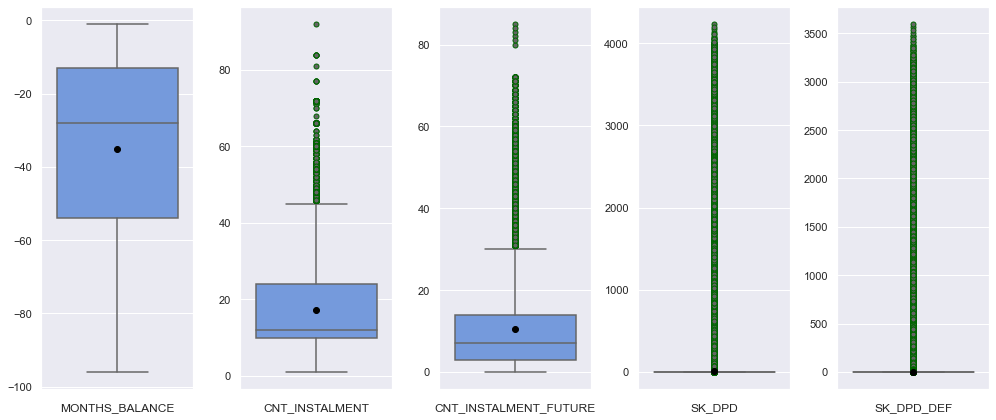

In [148]:
create_boxplots(POS_CASH_balance.select_dtypes(exclude="object"), 1, 5, (14, 6))

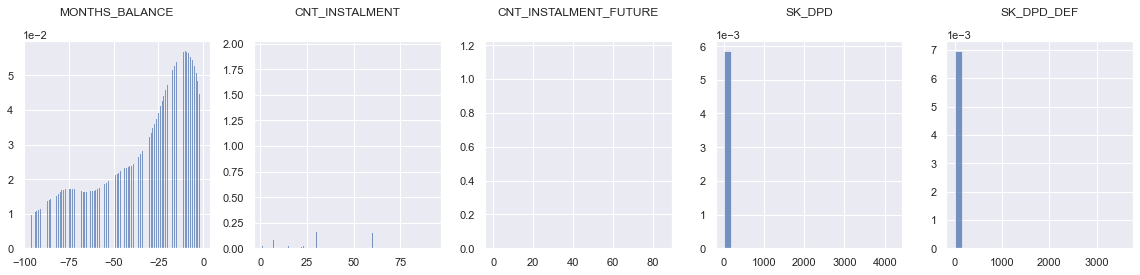

In [149]:
plot_histograms(POS_CASH_balance.select_dtypes(exclude="object"), 1, 5, (16, 4), hue=None)

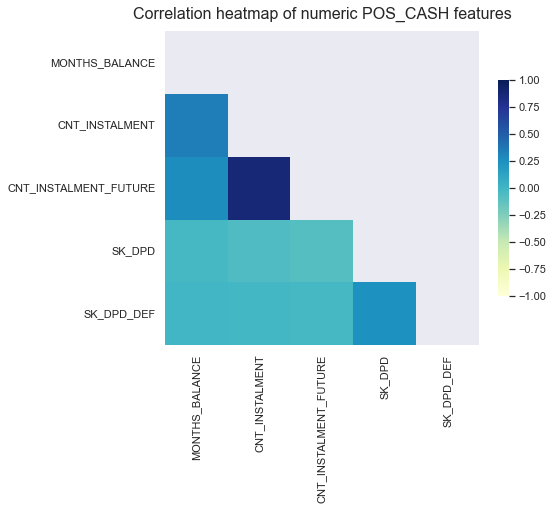

In [150]:
create_heatmap(
    POS_CASH_balance.select_dtypes(exclude="object"),
    "numeric POS_CASH features",
    (8, 8),
)

In [151]:
pos_cash_limited = (
    POS_CASH_balance.groupby("SK_ID_CURR")
    .agg({"SK_ID_PREV": "count", "SK_DPD": "mean", "SK_DPD_DEF": "mean"})
    .sort_values("SK_ID_PREV", ascending=False)
)

In [152]:
pos_cash_limited["DPD_IMPORTANT"] = (
    pos_cash_limited["SK_DPD_DEF"] / pos_cash_limited["SK_DPD"]
)
pos_cash_limited[pos_cash_limited["DPD_IMPORTANT"] >= 0].sort_values(
    by="DPD_IMPORTANT", ascending=False
).tail()

,SK_ID_PREV,SK_DPD,SK_DPD_DEF,DPD_IMPORTANT
SK_ID_CURR,,,,
255363,21,6.428571,0.0,0.0
379934,21,3.476190,0.0,0.0
327337,38,2.973684,0.0,0.0
337964,79,0.037975,0.0,0.0
170361,19,0.105263,0.0,0.0


In [153]:
pos_cash_limited = pos_cash_limited.rename(
    columns={
        "SK_ID_PREV": "TOTAL_NB_POS_CASH",
        "SK_DPD": "SK_DPD_PC",
        "SK_DPD_DEF": "SK_DPD_DEF_PC",
        "DPD_IMPORTANT": "DPD_IMPORTANT_PC",
    }
)

In [154]:
pos_cash_limited.to_csv("pos_cash_limited.csv")


----
----